## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
Flight_Data = pd.read_excel('/Users/boss/Desktop/MSC PROJECT/dataset/FlightDelayData_Nov-March2022.xlsx')
Flight_Data.head(2).append(Flight_Data.tail(2))

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2021,11,17,3,11/17/2021 12:00:00 AM,UA,3727,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",1405,1412.0,7.0,36.0,1448.0,1700.0,2.0,1701,1702.0,1.0,0,NaN,116,110.0,72.0,536,NaN,NaN,NaN,NaN,NaN
1,2021,11,17,3,11/17/2021 12:00:00 AM,UA,3726,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",1730,1749.0,19.0,31.0,1820.0,1849.0,18.0,1837,1907.0,30.0,0,NaN,127,138.0,89.0,473,1.0,0.0,11.0,0.0,18.0
769271,2022,3,13,7,3/13/2022 12:00:00 AM,WN,202,N8517F,BWI,"Baltimore, MD",IND,"Indianapolis, IN",1235,1312.0,37.0,7.0,1319.0,1446.0,7.0,1430,1453.0,23.0,0,NaN,115,101.0,87.0,516,15.0,0.0,0.0,0.0,8.0
769272,2022,3,13,7,3/13/2022 12:00:00 AM,WN,548,N414WN,BWI,"Baltimore, MD",IND,"Indianapolis, IN",2235,2359.0,84.0,10.0,9.0,129.0,5.0,20,134.0,74.0,0,NaN,105,95.0,80.0,516,34.0,0.0,0.0,0.0,40.0


In [3]:
Flight_Data.shape

(769273, 33)

## Data Cleaning / Pre-Processing

In [4]:
Flight_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769273 entries, 0 to 769272
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 769273 non-null  int64  
 1   MONTH                769273 non-null  int64  
 2   DAY_OF_MONTH         769273 non-null  int64  
 3   DAY_OF_WEEK          769273 non-null  int64  
 4   FL_DATE              769273 non-null  object 
 5   MKT_UNIQUE_CARRIER   769273 non-null  object 
 6   MKT_CARRIER_FL_NUM   769273 non-null  int64  
 7   TAIL_NUM             761816 non-null  object 
 8   ORIGIN               769273 non-null  object 
 9   ORIGIN_CITY_NAME     769273 non-null  object 
 10  DEST                 769273 non-null  object 
 11  DEST_CITY_NAME       769273 non-null  object 
 12  CRS_DEP_TIME         769273 non-null  int64  
 13  DEP_TIME             743625 non-null  float64
 14  DEP_DELAY            743603 non-null  float64
 15  TAXI_OUT         

In [5]:
Flight_Data.MKT_UNIQUE_CARRIER.unique()

array(['UA', 'AA', 'G4', 'DL', 'F9', 'WN', 'AS', 'HA', 'NK'], dtype=object)

In [6]:
Flight_Data['MKT_UNIQUE_CARRIER'].replace({
    'UA':'United Airlines',
    'AA':'American Airlines',
    'G4':'Allegiant Air',
    'DL':'Delta Airlines',
    'F9':'Frontier Airlines',
    'WN':'Southwest Airlines',
    'AS':'Alaska Airlines',
    'HA':'Hawaiian Airlines',
    'NK':'Spirit Airlines'

}, inplace=True)

In [7]:
Flight_Data.MKT_UNIQUE_CARRIER.nunique()

9

In [8]:
Flight_Data.MKT_UNIQUE_CARRIER.value_counts()

Delta Airlines        267940
American Airlines     184708
United Airlines       140286
Southwest Airlines     87421
Alaska Airlines        26552
Allegiant Air          20874
Spirit Airlines        19236
Frontier Airlines      16247
Hawaiian Airlines       6009
Name: MKT_UNIQUE_CARRIER, dtype: int64

In [9]:
#Cancelled
Flight_Data.CANCELLED.nunique()

2

In [10]:
Flight_Data.CANCELLED.value_counts()

0    743221
1     26052
Name: CANCELLED, dtype: int64

In [11]:
Delay = Flight_Data[(Flight_Data['CANCELLED'] == 1)]
print('shape:', Delay.shape)
Delay.head(3).append(Delay.tail(3))

shape: (26052, 33)


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
309,2021,11,16,2,11/16/2021 12:00:00 AM,United Airlines,4378,NaN,IAD,"Washington, DC",GSP,"Greer, SC",1715,NaN,NaN,NaN,NaN,NaN,NaN,1856,NaN,NaN,1,A,101,NaN,NaN,384,NaN,NaN,NaN,NaN,NaN
572,2021,11,16,2,11/16/2021 12:00:00 AM,United Airlines,3886,NaN,DAY,"Dayton, OH",ORD,"Chicago, IL",1130,NaN,NaN,NaN,NaN,NaN,NaN,1152,NaN,NaN,1,A,82,NaN,NaN,240,NaN,NaN,NaN,NaN,NaN
1177,2021,11,15,1,11/15/2021 12:00:00 AM,United Airlines,4177,NaN,IAD,"Washington, DC",RIC,"Richmond, VA",2210,NaN,NaN,NaN,NaN,NaN,NaN,2306,NaN,NaN,1,A,56,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN
769255,2022,3,13,7,3/13/2022 12:00:00 AM,Southwest Airlines,347,N8569Z,BWI,"Baltimore, MD",DTW,"Detroit, MI",815,NaN,NaN,NaN,NaN,NaN,NaN,955,NaN,NaN,1,A,100,NaN,NaN,409,NaN,NaN,NaN,NaN,NaN
769267,2022,3,13,7,3/13/2022 12:00:00 AM,Southwest Airlines,1892,N8814K,BWI,"Baltimore, MD",GSP,"Greer, SC",1605,NaN,NaN,NaN,NaN,NaN,NaN,1735,NaN,NaN,1,A,90,NaN,NaN,426,NaN,NaN,NaN,NaN,NaN
769268,2022,3,13,7,3/13/2022 12:00:00 AM,Southwest Airlines,697,N7811F,BWI,"Baltimore, MD",HOU,"Houston, TX",630,NaN,NaN,NaN,NaN,NaN,NaN,905,NaN,NaN,1,A,215,NaN,NaN,1246,NaN,NaN,NaN,NaN,NaN


In [12]:
Delay.CANCELLED.nunique()

1

In [13]:
Delay.CANCELLED.value_counts()

1    26052
Name: CANCELLED, dtype: int64

In [14]:
Flight_Data = Flight_Data[(Flight_Data['CANCELLED'] == 0)]
Flight_Data.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,3727,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",1405,1412.0,7.0,36.0,1448.0,1700.0,2.0,1701,1702.0,1.0,0,NaN,116,110.0,72.0,536,NaN,NaN,NaN,NaN,NaN
1,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,3726,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",1730,1749.0,19.0,31.0,1820.0,1849.0,18.0,1837,1907.0,30.0,0,NaN,127,138.0,89.0,473,1.0,0.0,11.0,0.0,18.0


In [15]:
Flight_Data = Flight_Data.drop(['CANCELLED'], axis = 1)

In [16]:
Flight_Data.shape

(743221, 32)

In [17]:
#Cancellation code
Flight_Data.CANCELLATION_CODE.nunique()

0

In [18]:
Flight_Data.CANCELLATION_CODE.value_counts()

Series([], Name: CANCELLATION_CODE, dtype: int64)

In [19]:
Flight_Data.CANCELLATION_CODE.unique()

array([nan], dtype=object)

In [20]:
CancellationCode_A = Flight_Data['CANCELLATION_CODE'] == 'A'
CancellationCode_B = Flight_Data['CANCELLATION_CODE'] == 'B'
CancellationCode_C = Flight_Data['CANCELLATION_CODE'] == 'C'
CancellationCode_D = Flight_Data['CANCELLATION_CODE'] == 'D'

In [21]:
Flight_Data_CancellationCode_A = Flight_Data[CancellationCode_A]
Flight_Data_CancellationCode_B = Flight_Data[CancellationCode_B]
Flight_Data_CancellationCode_C = Flight_Data[CancellationCode_C]
Flight_Data_CancellationCode_D = Flight_Data[CancellationCode_D]
print('Flight_Data_CancellationCode_A shape:', Flight_Data_CancellationCode_A.shape)
print('Flight_Data_CancellationCode_B shape:', Flight_Data_CancellationCode_B.shape)
print('Flight_Data_CancellationCode_C shape:', Flight_Data_CancellationCode_C.shape)
print('Flight_Data_CancellationCode_D shape:', Flight_Data_CancellationCode_D.shape)

Flight_Data_CancellationCode_A shape: (0, 32)
Flight_Data_CancellationCode_B shape: (0, 32)
Flight_Data_CancellationCode_C shape: (0, 32)
Flight_Data_CancellationCode_D shape: (0, 32)


In [22]:
Flight_Data = Flight_Data.drop(["CANCELLATION_CODE"], axis=1)

In [23]:
print(Flight_Data.CARRIER_DELAY.isna().sum())
print(Flight_Data.WEATHER_DELAY.isna().sum())
print(Flight_Data.NAS_DELAY.isna().sum())
print(Flight_Data.SECURITY_DELAY.isna().sum())
print(Flight_Data.LATE_AIRCRAFT_DELAY.isna().sum())

592422
592422
592422
592422
592422


In [24]:
print("Percentage of valid data:", 100 - (Flight_Data.CARRIER_DELAY.isna().sum()*100/len(Flight_Data)))
print("Percentage of missing values:", (Flight_Data.CARRIER_DELAY.isna().sum()*100/len(Flight_Data)))

Percentage of valid data: 20.289927222185597
Percentage of missing values: 79.7100727778144


In [25]:
Flight_Data = Flight_Data.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1)
print('The current shape of Flight Data is:', Flight_Data.shape)
Flight_Data.head(3).append(Flight_Data.tail(3))



The current shape of Flight Data is: (743221, 26)


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,3727,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",1405,1412.0,7.0,36.0,1448.0,1700.0,2.0,1701,1702.0,1.0,116,110.0,72.0,536
1,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,3726,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",1730,1749.0,19.0,31.0,1820.0,1849.0,18.0,1837,1907.0,30.0,127,138.0,89.0,473
2,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,3725,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",620,610.0,-10.0,20.0,630.0,659.0,15.0,725,714.0,-11.0,65,64.0,29.0,67
769270,2022,3,13,7,3/13/2022 12:00:00 AM,Southwest Airlines,2120,N8608N,BWI,"Baltimore, MD",HOU,"Houston, TX",1830,2038.0,128.0,10.0,2048.0,2249.0,14.0,2105,2303.0,118.0,215,205.0,181.0,1246
769271,2022,3,13,7,3/13/2022 12:00:00 AM,Southwest Airlines,202,N8517F,BWI,"Baltimore, MD",IND,"Indianapolis, IN",1235,1312.0,37.0,7.0,1319.0,1446.0,7.0,1430,1453.0,23.0,115,101.0,87.0,516
769272,2022,3,13,7,3/13/2022 12:00:00 AM,Southwest Airlines,548,N414WN,BWI,"Baltimore, MD",IND,"Indianapolis, IN",2235,2359.0,84.0,10.0,9.0,129.0,5.0,20,134.0,74.0,105,95.0,80.0,516


In [26]:
Flight_Data = Flight_Data.drop(['MKT_CARRIER_FL_NUM'], axis=1)
Flight_Data.head(3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",1405,1412.0,7.0,36.0,1448.0,1700.0,2.0,1701,1702.0,1.0,116,110.0,72.0,536
1,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",1730,1749.0,19.0,31.0,1820.0,1849.0,18.0,1837,1907.0,30.0,127,138.0,89.0,473
2,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",620,610.0,-10.0,20.0,630.0,659.0,15.0,725,714.0,-11.0,65,64.0,29.0,67


In [27]:
Flight_Data.drop(columns=['DEP_TIME', 'ARR_TIME'], inplace=True)
Flight_Data.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",1405,7.0,36.0,1448.0,1700.0,2.0,1701,1.0,116,110.0,72.0,536
1,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",1730,19.0,31.0,1820.0,1849.0,18.0,1837,30.0,127,138.0,89.0,473


In [28]:
Flight_Data.to_csv('Flight_Data.csv')

In [29]:
#Dealing with Null values

Flight_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743221 entries, 0 to 769272
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 743221 non-null  int64  
 1   MONTH                743221 non-null  int64  
 2   DAY_OF_MONTH         743221 non-null  int64  
 3   DAY_OF_WEEK          743221 non-null  int64  
 4   FL_DATE              743221 non-null  object 
 5   MKT_UNIQUE_CARRIER   743221 non-null  object 
 6   TAIL_NUM             743221 non-null  object 
 7   ORIGIN               743221 non-null  object 
 8   ORIGIN_CITY_NAME     743221 non-null  object 
 9   DEST                 743221 non-null  object 
 10  DEST_CITY_NAME       743221 non-null  object 
 11  CRS_DEP_TIME         743221 non-null  int64  
 12  DEP_DELAY            743221 non-null  float64
 13  TAXI_OUT             743221 non-null  float64
 14  WHEELS_OFF           743221 non-null  float64
 15  WHEELS_ON        

In [30]:
Flight_Data.isna().sum()


YEAR                      0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
FL_DATE                   0
MKT_UNIQUE_CARRIER        0
TAIL_NUM                  0
ORIGIN                    0
ORIGIN_CITY_NAME          0
DEST                      0
DEST_CITY_NAME            0
CRS_DEP_TIME              0
DEP_DELAY                 0
TAXI_OUT                  0
WHEELS_OFF                0
WHEELS_ON               201
TAXI_IN                 201
CRS_ARR_TIME              0
ARR_DELAY              1506
CRS_ELAPSED_TIME          0
ACTUAL_ELAPSED_TIME    1506
AIR_TIME               1506
DISTANCE                  0
dtype: int64

In [31]:
print('The current shape of Flight delay is:', Flight_Data.shape)
Flight_Data.head(3).append(Flight_Data.tail(3))


The current shape of Flight delay is: (743221, 23)


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",1405,7.0,36.0,1448.0,1700.0,2.0,1701,1.0,116,110.0,72.0,536
1,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",1730,19.0,31.0,1820.0,1849.0,18.0,1837,30.0,127,138.0,89.0,473
2,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",620,-10.0,20.0,630.0,659.0,15.0,725,-11.0,65,64.0,29.0,67
769270,2022,3,13,7,3/13/2022 12:00:00 AM,Southwest Airlines,N8608N,BWI,"Baltimore, MD",HOU,"Houston, TX",1830,128.0,10.0,2048.0,2249.0,14.0,2105,118.0,215,205.0,181.0,1246
769271,2022,3,13,7,3/13/2022 12:00:00 AM,Southwest Airlines,N8517F,BWI,"Baltimore, MD",IND,"Indianapolis, IN",1235,37.0,7.0,1319.0,1446.0,7.0,1430,23.0,115,101.0,87.0,516
769272,2022,3,13,7,3/13/2022 12:00:00 AM,Southwest Airlines,N414WN,BWI,"Baltimore, MD",IND,"Indianapolis, IN",2235,84.0,10.0,9.0,129.0,5.0,20,74.0,105,95.0,80.0,516


In [32]:
Flight_Data.isna().sum()

YEAR                      0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
FL_DATE                   0
MKT_UNIQUE_CARRIER        0
TAIL_NUM                  0
ORIGIN                    0
ORIGIN_CITY_NAME          0
DEST                      0
DEST_CITY_NAME            0
CRS_DEP_TIME              0
DEP_DELAY                 0
TAXI_OUT                  0
WHEELS_OFF                0
WHEELS_ON               201
TAXI_IN                 201
CRS_ARR_TIME              0
ARR_DELAY              1506
CRS_ELAPSED_TIME          0
ACTUAL_ELAPSED_TIME    1506
AIR_TIME               1506
DISTANCE                  0
dtype: int64

In [33]:
print('Total Number of missing values:', Flight_Data.isna().sum().sum())
print('Flight Data shape:', Flight_Data.shape)

Total Number of missing values: 4920
Flight Data shape: (743221, 23)


In [34]:
Flight_Data_NaN = Flight_Data.loc[Flight_Data.isnull().any(axis=1)]
Flight_Data_NaN.head(20)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
1038,2021,11,15,1,11/15/2021 12:00:00 AM,United Airlines,N16147,DEN,"Denver, CO",LIT,"Little Rock, AR",1005,16.0,64.0,1125.0,1643.0,4.0,1317,NaN,132,NaN,NaN,771
1255,2021,11,15,1,11/15/2021 12:00:00 AM,United Airlines,N446AW,ORD,"Chicago, IL",PWM,"Portland, ME",1800,-4.0,57.0,1853.0,100.0,4.0,2135,NaN,155,NaN,NaN,900
1466,2021,11,14,7,11/14/2021 12:00:00 AM,United Airlines,N12136,IAD,"Washington, DC",TYS,"Knoxville, TN",1715,13.0,23.0,1751.0,14.0,16.0,1901,NaN,106,NaN,NaN,420
1811,2021,11,14,7,11/14/2021 12:00:00 AM,United Airlines,N17159,DEN,"Denver, CO",SGF,"Springfield, MO",1720,-8.0,20.0,1732.0,2325.0,3.0,2017,NaN,117,NaN,NaN,637
2221,2021,11,13,6,11/13/2021 12:00:00 AM,United Airlines,N526GJ,STL,"St. Louis, MO",EWR,"Newark, NJ",1135,-4.0,17.0,1148.0,1713.0,6.0,1501,NaN,146,NaN,NaN,872
2451,2021,11,13,6,11/13/2021 12:00:00 AM,United Airlines,N568GJ,RIC,"Richmond, VA",EWR,"Newark, NJ",1425,-3.0,59.0,1521.0,1854.0,16.0,1553,NaN,88,NaN,NaN,277
3597,2021,11,11,4,2021-11-11 00:00:00,United Airlines,N535GJ,LGA,"New York, NY",IAD,"Washington, DC",600,7.0,25.0,632.0,1121.0,11.0,726,NaN,86,NaN,NaN,229
3832,2021,11,11,4,2021-11-11 00:00:00,United Airlines,N520GJ,EWR,"Newark, NJ",GSP,"Greer, SC",1900,-2.0,36.0,1934.0,2347.0,3.0,2118,NaN,138,NaN,NaN,594
4418,2021,11,10,3,2021-10-11 00:00:00,United Airlines,N21144,JAN,"Jackson/Vicksburg, MS",IAH,"Houston, TX",1700,1.0,10.0,1711.0,2132.0,11.0,1837,NaN,97,NaN,NaN,351
4896,2021,11,9,2,2021-09-11 00:00:00,United Airlines,N11189,ROC,"Rochester, NY",IAD,"Washington, DC",1945,-10.0,21.0,1956.0,2220.0,6.0,2110,NaN,85,NaN,NaN,288


In [35]:
Flight_Data_NaN.shape

(1506, 23)

In [36]:
NaN_Perc = (len(Flight_Data_NaN)*100)/len(Flight_Data)
print('Percentage of rows with NaN value:', NaN_Perc)

Percentage of rows with NaN value: 0.20263151875417945


In [37]:
Flight_Data['TAXI_IN'].fillna((Flight_Data['TAXI_IN'].mean()), inplace=True)
Flight_Data_NaN['TAXI_IN'].fillna((Flight_Data_NaN['TAXI_IN'].mean()), inplace=True)

In [38]:
Flight_Data_NaN.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
1038,2021,11,15,1,11/15/2021 12:00:00 AM,United Airlines,N16147,DEN,"Denver, CO",LIT,"Little Rock, AR",1005,16.0,64.0,1125.0,1643.0,4.0,1317,NaN,132,NaN,NaN,771
1255,2021,11,15,1,11/15/2021 12:00:00 AM,United Airlines,N446AW,ORD,"Chicago, IL",PWM,"Portland, ME",1800,-4.0,57.0,1853.0,100.0,4.0,2135,NaN,155,NaN,NaN,900
1466,2021,11,14,7,11/14/2021 12:00:00 AM,United Airlines,N12136,IAD,"Washington, DC",TYS,"Knoxville, TN",1715,13.0,23.0,1751.0,14.0,16.0,1901,NaN,106,NaN,NaN,420
1811,2021,11,14,7,11/14/2021 12:00:00 AM,United Airlines,N17159,DEN,"Denver, CO",SGF,"Springfield, MO",1720,-8.0,20.0,1732.0,2325.0,3.0,2017,NaN,117,NaN,NaN,637
2221,2021,11,13,6,11/13/2021 12:00:00 AM,United Airlines,N526GJ,STL,"St. Louis, MO",EWR,"Newark, NJ",1135,-4.0,17.0,1148.0,1713.0,6.0,1501,NaN,146,NaN,NaN,872


In [39]:
Flight_Data.TAXI_IN.isna().sum()

0

In [40]:
Flight_Data = Flight_Data.dropna()

In [41]:
Flight_Data.shape

(741715, 23)

In [42]:
Flight_Data.isna().sum()

YEAR                   0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
MKT_UNIQUE_CARRIER     0
TAIL_NUM               0
ORIGIN                 0
ORIGIN_CITY_NAME       0
DEST                   0
DEST_CITY_NAME         0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

In [43]:
Flight_Data.head(10)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",1405,7.0,36.0,1448.0,1700.0,2.0,1701,1.0,116,110.0,72.0,536
1,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",1730,19.0,31.0,1820.0,1849.0,18.0,1837,30.0,127,138.0,89.0,473
2,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",620,-10.0,20.0,630.0,659.0,15.0,725,-11.0,65,64.0,29.0,67
3,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N436AW,IAD,"Washington, DC",CHO,"Charlottesville, VA",1730,-10.0,16.0,1736.0,1754.0,30.0,1825,-1.0,55,64.0,18.0,77
4,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N433AW,ORD,"Chicago, IL",PNS,"Pensacola, FL",1255,-6.0,35.0,1324.0,1528.0,4.0,1528,4.0,153,163.0,124.0,794
5,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N433AW,PNS,"Pensacola, FL",ORD,"Chicago, IL",1601,0.0,17.0,1618.0,1818.0,9.0,1840,-13.0,159,146.0,120.0,794
6,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N459AW,COU,"Columbia, MO",ORD,"Chicago, IL",825,-1.0,13.0,837.0,934.0,8.0,1000,-18.0,95,78.0,57.0,315
7,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N433AW,CAE,"Columbia, SC",ORD,"Chicago, IL",641,-10.0,12.0,643.0,730.0,9.0,810,-31.0,149,128.0,107.0,666
8,2021,11,16,2,11/16/2021 12:00:00 AM,United Airlines,N24128,XNA,"Fayetteville, AR",DEN,"Denver, CO",1350,-2.0,18.0,1406.0,1441.0,15.0,1458,-2.0,128,128.0,95.0,616
9,2021,11,16,2,11/16/2021 12:00:00 AM,United Airlines,N14168,IAH,"Houston, TX",GPT,"Gulfport/Biloxi, MS",1200,14.0,23.0,1237.0,1334.0,5.0,1327,12.0,87,85.0,57.0,376


In [44]:
Flight_Data['CRS_DEP_TIME'] = np.ceil(Flight_Data['CRS_DEP_TIME']/600).apply(int)
Flight_Data['WHEELS_OFF'] = np.ceil(Flight_Data['WHEELS_OFF']/600).apply(int) 
Flight_Data['WHEELS_ON'] = np.ceil(Flight_Data['WHEELS_ON']/600).apply(int)
Flight_Data['CRS_ARR_TIME'] = np.ceil(Flight_Data['CRS_ARR_TIME']/600).apply(int)

In [45]:
Flight_Data.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",3,7.0,36.0,3,3,2.0,3,1.0,116,110.0,72.0,536
1,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473
2,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",2,-10.0,20.0,2,2,15.0,2,-11.0,65,64.0,29.0,67
3,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N436AW,IAD,"Washington, DC",CHO,"Charlottesville, VA",3,-10.0,16.0,3,3,30.0,4,-1.0,55,64.0,18.0,77
4,2021,11,17,3,11/17/2021 12:00:00 AM,United Airlines,N433AW,ORD,"Chicago, IL",PNS,"Pensacola, FL",3,-6.0,35.0,3,3,4.0,3,4.0,153,163.0,124.0,794


In [46]:
Flight_Data['FL_DATE'] = pd.to_datetime(Flight_Data['FL_DATE'])
Flight_Data['FLYearMonth'] = Flight_Data['FL_DATE'].map(lambda date: 100*date.year + date.month)
Flight_Data['FLIGHTDATE'] = Flight_Data['FL_DATE'].dt.strftime('%Y-%m')

In [47]:
Flight_Data.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLYearMonth,FLIGHTDATE
0,2021,11,17,3,2021-11-17,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",3,7.0,36.0,3,3,2.0,3,1.0,116,110.0,72.0,536,202111,2021-11
1,2021,11,17,3,2021-11-17,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473,202111,2021-11
2,2021,11,17,3,2021-11-17,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",2,-10.0,20.0,2,2,15.0,2,-11.0,65,64.0,29.0,67,202111,2021-11
3,2021,11,17,3,2021-11-17,United Airlines,N436AW,IAD,"Washington, DC",CHO,"Charlottesville, VA",3,-10.0,16.0,3,3,30.0,4,-1.0,55,64.0,18.0,77,202111,2021-11
4,2021,11,17,3,2021-11-17,United Airlines,N433AW,ORD,"Chicago, IL",PNS,"Pensacola, FL",3,-6.0,35.0,3,3,4.0,3,4.0,153,163.0,124.0,794,202111,2021-11


In [48]:
print('Total Number of days in a month:', Flight_Data.DAY_OF_MONTH.nunique())
print('Total number of Months:', Flight_Data.MONTH.nunique())

Total Number of days in a month: 31
Total number of Months: 5


In [49]:
import calendar
Flight_Data['MONTH_Name'] = Flight_Data['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [50]:
Flight_Data.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLYearMonth,FLIGHTDATE,MONTH_Name
0,2021,11,17,3,2021-11-17,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",3,7.0,36.0,3,3,2.0,3,1.0,116,110.0,72.0,536,202111,2021-11,Nov
1,2021,11,17,3,2021-11-17,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473,202111,2021-11,Nov
2,2021,11,17,3,2021-11-17,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",2,-10.0,20.0,2,2,15.0,2,-11.0,65,64.0,29.0,67,202111,2021-11,Nov
3,2021,11,17,3,2021-11-17,United Airlines,N436AW,IAD,"Washington, DC",CHO,"Charlottesville, VA",3,-10.0,16.0,3,3,30.0,4,-1.0,55,64.0,18.0,77,202111,2021-11,Nov
4,2021,11,17,3,2021-11-17,United Airlines,N433AW,ORD,"Chicago, IL",PNS,"Pensacola, FL",3,-6.0,35.0,3,3,4.0,3,4.0,153,163.0,124.0,794,202111,2021-11,Nov


In [51]:
print('Months present in dataset:', Flight_Data.MONTH.unique())
print('Months present in dataset:', Flight_Data.MONTH_Name.unique())

Months present in dataset: [11 12  1  2  3]
Months present in dataset: ['Nov' 'Dec' 'Jan' 'Feb' 'Mar']


In [52]:
#Binary Classification

Sts = []

for value in Flight_Data['ARR_DELAY']:
    if value < 0:
        Sts.append(0)
    else:
        Sts.append(1)
Flight_Data['FLIGHT_STATUS'] = Sts
Flight_Data.head(2)    

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLYearMonth,FLIGHTDATE,MONTH_Name,FLIGHT_STATUS
0,2021,11,17,3,2021-11-17,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",3,7.0,36.0,3,3,2.0,3,1.0,116,110.0,72.0,536,202111,2021-11,Nov,1
1,2021,11,17,3,2021-11-17,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473,202111,2021-11,Nov,1


In [53]:
Flight_Data.FLIGHT_STATUS.value_counts(normalize=True)

0    0.618658
1    0.381342
Name: FLIGHT_STATUS, dtype: float64

In [54]:
Flight_Data.to_csv('Flight_Data.csv')

In [55]:
Flight_Data.isna().sum()

YEAR                   0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
MKT_UNIQUE_CARRIER     0
TAIL_NUM               0
ORIGIN                 0
ORIGIN_CITY_NAME       0
DEST                   0
DEST_CITY_NAME         0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
FLYearMonth            0
FLIGHTDATE             0
MONTH_Name             0
FLIGHT_STATUS          0
dtype: int64

In [56]:
Flight_Data1 = pd.read_csv('Flight_Data.csv', index_col=0)
Flight_Data1.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLYearMonth,FLIGHTDATE,MONTH_Name,FLIGHT_STATUS
0,2021,11,17,3,2021-11-17,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",3,7.0,36.0,3,3,2.0,3,1.0,116,110.0,72.0,536,202111,2021-11,Nov,1
1,2021,11,17,3,2021-11-17,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473,202111,2021-11,Nov,1
2,2021,11,17,3,2021-11-17,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",2,-10.0,20.0,2,2,15.0,2,-11.0,65,64.0,29.0,67,202111,2021-11,Nov,0
3,2021,11,17,3,2021-11-17,United Airlines,N436AW,IAD,"Washington, DC",CHO,"Charlottesville, VA",3,-10.0,16.0,3,3,30.0,4,-1.0,55,64.0,18.0,77,202111,2021-11,Nov,0
4,2021,11,17,3,2021-11-17,United Airlines,N433AW,ORD,"Chicago, IL",PNS,"Pensacola, FL",3,-6.0,35.0,3,3,4.0,3,4.0,153,163.0,124.0,794,202111,2021-11,Nov,1


In [57]:
Flight_Data1.DAY_OF_WEEK.value_counts()

1    114460
4    112023
2    107719
7    106164
5    105480
3    104617
6     91252
Name: DAY_OF_WEEK, dtype: int64

In [58]:
Flight_Data1.DEST_CITY_NAME.value_counts().iloc[:20]

Atlanta, GA              60007
Chicago, IL              34708
New York, NY             34013
Dallas/Fort Worth, TX    29388
Washington, DC           23982
Denver, CO               22902
Houston, TX              22648
Detroit, MI              19883
Los Angeles, CA          19466
Phoenix, AZ              19276
Minneapolis, MN          18899
Charlotte, NC            18270
Salt Lake City, UT       17269
Seattle, WA              15755
Las Vegas, NV            15672
Newark, NJ               15520
Orlando, FL              14793
Miami, FL                12540
Boston, MA               12078
San Francisco, CA        11145
Name: DEST_CITY_NAME, dtype: int64

In [59]:
Cities_Top = Flight_Data1.DEST_CITY_NAME.value_counts().iloc[0:20].rename_axis('DEST_CITY_NAME').reset_index(name='FLIGHTSInTotal')
Cities_Top.head()


,DEST_CITY_NAME,FLIGHTSInTotal
0,"Atlanta, GA",60007
1,"Chicago, IL",34708
2,"New York, NY",34013
3,"Dallas/Fort Worth, TX",29388
4,"Washington, DC",23982


In [60]:
# Creating a list with top 20 cities only:
List_City = Cities_Top['DEST_CITY_NAME'].tolist()
List_City

['Atlanta, GA',
 'Chicago, IL',
 'New York, NY',
 'Dallas/Fort Worth, TX',
 'Washington, DC',
 'Denver, CO',
 'Houston, TX',
 'Detroit, MI',
 'Los Angeles, CA',
 'Phoenix, AZ',
 'Minneapolis, MN',
 'Charlotte, NC',
 'Salt Lake City, UT',
 'Seattle, WA',
 'Las Vegas, NV',
 'Newark, NJ',
 'Orlando, FL',
 'Miami, FL',
 'Boston, MA',
 'San Francisco, CA']

In [61]:
Boolean = Flight_Data1.DEST_CITY_NAME.isin(List_City)
Flight = Flight_Data1[Boolean]
Flight.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLYearMonth,FLIGHTDATE,MONTH_Name,FLIGHT_STATUS
1,2021,11,17,3,2021-11-17,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473,202111,2021-11,Nov,1
2,2021,11,17,3,2021-11-17,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",2,-10.0,20.0,2,2,15.0,2,-11.0,65,64.0,29.0,67,202111,2021-11,Nov,0
5,2021,11,17,3,2021-11-17,United Airlines,N433AW,PNS,"Pensacola, FL",ORD,"Chicago, IL",3,0.0,17.0,3,4,9.0,4,-13.0,159,146.0,120.0,794,202111,2021-11,Nov,0
6,2021,11,17,3,2021-11-17,United Airlines,N459AW,COU,"Columbia, MO",ORD,"Chicago, IL",2,-1.0,13.0,2,2,8.0,2,-18.0,95,78.0,57.0,315,202111,2021-11,Nov,0
7,2021,11,17,3,2021-11-17,United Airlines,N433AW,CAE,"Columbia, SC",ORD,"Chicago, IL",2,-10.0,12.0,2,2,9.0,2,-31.0,149,128.0,107.0,666,202111,2021-11,Nov,0


In [62]:
Flight.DEST_CITY_NAME.unique()

array(['Chicago, IL', 'Denver, CO', 'Houston, TX', 'Washington, DC',
       'Newark, NJ', 'New York, NY', 'Detroit, MI', 'Charlotte, NC',
       'Atlanta, GA', 'Dallas/Fort Worth, TX', 'Minneapolis, MN',
       'Miami, FL', 'Boston, MA', 'Phoenix, AZ', 'Salt Lake City, UT',
       'Las Vegas, NV', 'Los Angeles, CA', 'Seattle, WA',
       'San Francisco, CA', 'Orlando, FL'], dtype=object)

In [63]:
Flight.DEST_CITY_NAME.value_counts()

Atlanta, GA              60007
Chicago, IL              34708
New York, NY             34013
Dallas/Fort Worth, TX    29388
Washington, DC           23982
Denver, CO               22902
Houston, TX              22648
Detroit, MI              19883
Los Angeles, CA          19466
Phoenix, AZ              19276
Minneapolis, MN          18899
Charlotte, NC            18270
Salt Lake City, UT       17269
Seattle, WA              15755
Las Vegas, NV            15672
Newark, NJ               15520
Orlando, FL              14793
Miami, FL                12540
Boston, MA               12078
San Francisco, CA        11145
Name: DEST_CITY_NAME, dtype: int64

In [64]:
Flight.shape 

(438214, 27)

In [65]:
Flight_Data1.shape

(741715, 27)

In [66]:
#Flight=Flight.drop(columns=['FL_DATE', 'TAIL_NUM', 'ORIGIN_STATE_ABR','ORIGIN_STATE_NM','DEST_STATE_ABR','DEST_STATE_NM','DEP_DELAY_NEW','DEP_DEL15','DEP_DELAY_GROUP','DEP_TIME_BLK'], axis = 1)
#Flight.head()


In [67]:
#Flight=Flight.drop(columns=['DAY'])
#Flight.head()

In [68]:
Flight=Flight.drop(columns=['FLYearMonth'])
Flight.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHTDATE,MONTH_Name,FLIGHT_STATUS
1,2021,11,17,3,2021-11-17,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473,2021-11,Nov,1
2,2021,11,17,3,2021-11-17,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",2,-10.0,20.0,2,2,15.0,2,-11.0,65,64.0,29.0,67,2021-11,Nov,0
5,2021,11,17,3,2021-11-17,United Airlines,N433AW,PNS,"Pensacola, FL",ORD,"Chicago, IL",3,0.0,17.0,3,4,9.0,4,-13.0,159,146.0,120.0,794,2021-11,Nov,0
6,2021,11,17,3,2021-11-17,United Airlines,N459AW,COU,"Columbia, MO",ORD,"Chicago, IL",2,-1.0,13.0,2,2,8.0,2,-18.0,95,78.0,57.0,315,2021-11,Nov,0
7,2021,11,17,3,2021-11-17,United Airlines,N433AW,CAE,"Columbia, SC",ORD,"Chicago, IL",2,-10.0,12.0,2,2,9.0,2,-31.0,149,128.0,107.0,666,2021-11,Nov,0


In [69]:
Flight.shape

(438214, 26)

In [70]:
Flight.to_csv('Flight.csv')

## Collinearity Check

In [71]:
Flight.corr()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
YEAR,1.000000,-0.987011,-0.019550,0.015289,-0.005385,0.030375,0.043846,-0.004984,-0.015492,0.002580,-0.013766,0.031054,0.032579,0.033902,0.028431,0.027318,0.018150
MONTH,-0.987011,1.000000,0.020176,-0.014608,0.009427,-0.026190,-0.058213,0.008743,0.015821,-0.004183,0.015377,-0.025604,-0.031109,-0.031317,-0.023711,-0.022863,-0.007575
DAY_OF_MONTH,-0.019550,0.020176,1.000000,-0.007294,-0.003618,0.000715,0.001988,-0.004744,-0.006510,-0.020001,-0.002647,0.003460,0.000172,0.002363,0.004183,0.003727,0.021231
DAY_OF_WEEK,0.015289,-0.014608,-0.007294,1.000000,0.004474,0.030736,0.019300,0.005763,-0.000295,0.018539,0.001298,0.033198,0.010693,0.013509,0.009298,0.011243,0.044828
CRS_DEP_TIME,-0.005385,0.009427,-0.003618,0.004474,1.000000,0.055645,-0.067571,0.884500,0.621531,0.033718,0.658402,0.055918,0.061458,0.063109,0.069931,0.069641,0.098964
DEP_DELAY,0.030375,-0.026190,0.000715,0.030736,0.055645,1.000000,0.052227,0.098182,0.040540,0.012653,0.043499,0.965909,0.019157,0.023302,0.015477,0.017575,0.360423
TAXI_OUT,0.043846,-0.058213,0.001988,0.019300,-0.067571,0.052227,1.000000,-0.033140,-0.050937,0.022051,-0.063458,0.191345,0.042625,0.153188,0.020149,0.005687,0.293975
WHEELS_OFF,-0.004984,0.008743,-0.004744,0.005763,0.884500,0.098182,-0.033140,1.000000,0.683714,0.038818,0.693713,0.101786,0.022000,0.027773,0.028784,0.022325,0.137041
WHEELS_ON,-0.015492,0.015821,-0.006510,-0.000295,0.621531,0.040540,-0.050937,0.683714,1.000000,0.039382,0.889514,0.045462,0.035092,0.040041,0.043613,0.039875,0.091107
TAXI_IN,0.002580,-0.004183,-0.020001,0.018539,0.033718,0.012653,0.022051,0.038818,0.039382,1.000000,0.037002,0.123295,0.039265,0.126276,0.023758,0.017329,0.197843


In [72]:
abs(Flight.corr())>.75

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
YEAR,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MONTH,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
DAY_OF_MONTH,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
DAY_OF_WEEK,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
CRS_DEP_TIME,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
DEP_DELAY,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
TAXI_OUT,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
WHEELS_OFF,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
WHEELS_ON,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
TAXI_IN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


<AxesSubplot:>

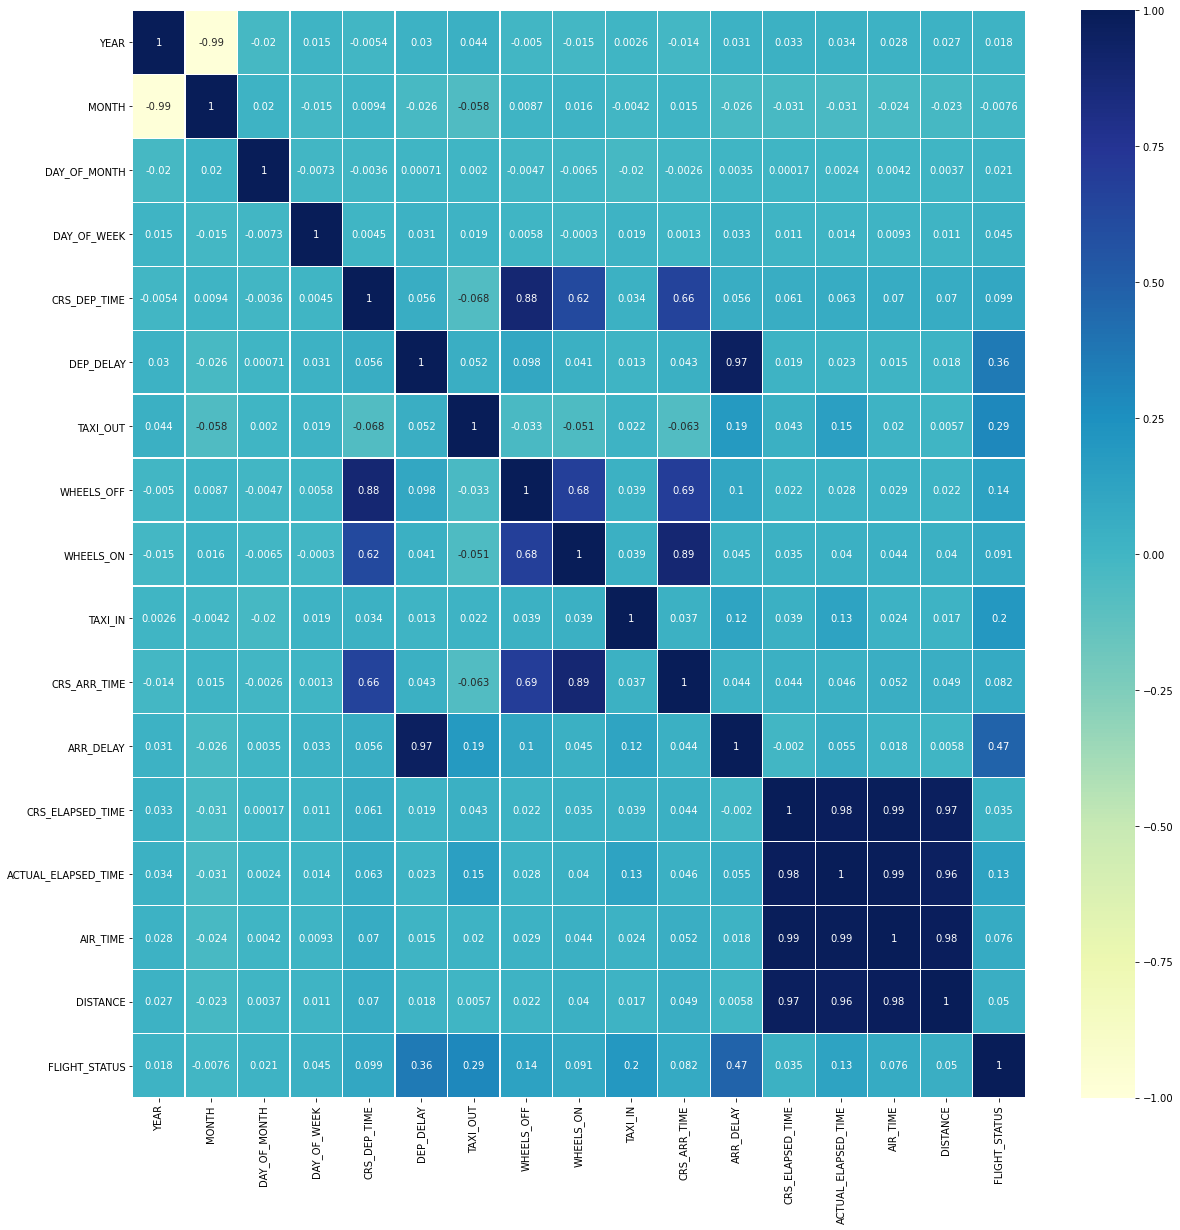

In [73]:
plt.figure(figsize =(20,20))
sns.heatmap(Flight.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

## Exploratory Data Analysis

In [74]:
Flight_Feb = Flight[(Flight['MONTH'] == 2)]
Flight_Feb.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHTDATE,MONTH_Name,FLIGHT_STATUS
478623,2022,2,1,2,2022-01-02,Delta Airlines,N297PQ,XNA,"Fayetteville, AR",LGA,"New York, NY",3,-6.0,10.0,3,4,10.0,4,-27.0,178,157.0,137.0,1147,2022-01,Feb,0
478624,2022,2,2,3,2022-02-02,Delta Airlines,N915XJ,XNA,"Fayetteville, AR",LGA,"New York, NY",3,-9.0,30.0,3,4,8.0,4,-15.0,178,172.0,134.0,1147,2022-02,Feb,0
478625,2022,2,3,4,2022-03-02,Delta Airlines,N200PQ,XNA,"Fayetteville, AR",LGA,"New York, NY",3,-11.0,49.0,3,4,10.0,4,7.0,178,196.0,137.0,1147,2022-03,Feb,1
478627,2022,2,6,7,2022-06-02,Delta Airlines,N918XJ,XNA,"Fayetteville, AR",LGA,"New York, NY",3,-11.0,12.0,3,4,7.0,4,-26.0,178,163.0,144.0,1147,2022-06,Feb,0
478628,2022,2,7,1,2022-07-02,Delta Airlines,N314PQ,XNA,"Fayetteville, AR",LGA,"New York, NY",3,75.0,20.0,4,4,16.0,4,90.0,178,193.0,157.0,1147,2022-07,Feb,1


In [75]:
Flight_Feb.MONTH.value_counts()

2    58997
Name: MONTH, dtype: int64

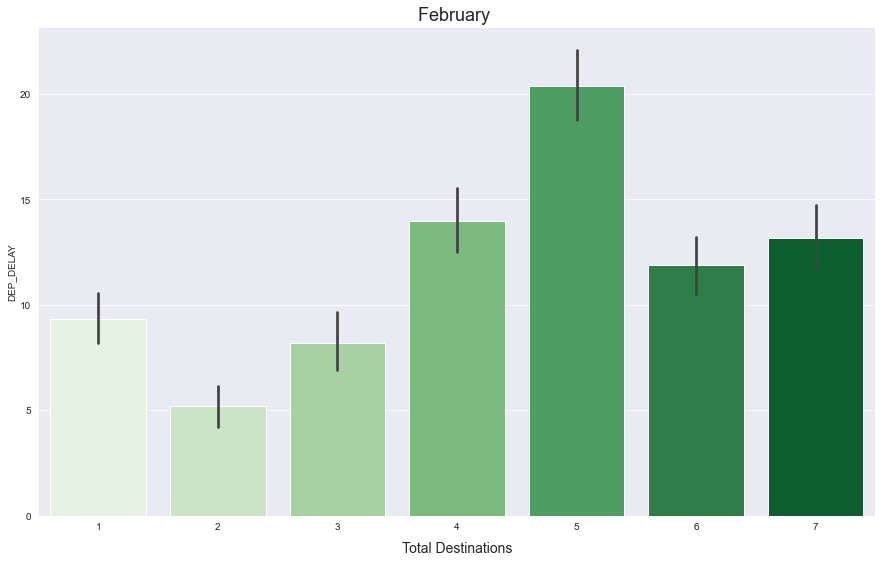

In [76]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DAY_OF_WEEK", y="DEP_DELAY", data=Flight_Feb, palette="Greens")
plt.title('February ', fontsize=18)
plt.xlabel('Total Destinations', fontsize=14, labelpad=10);
plt.show()

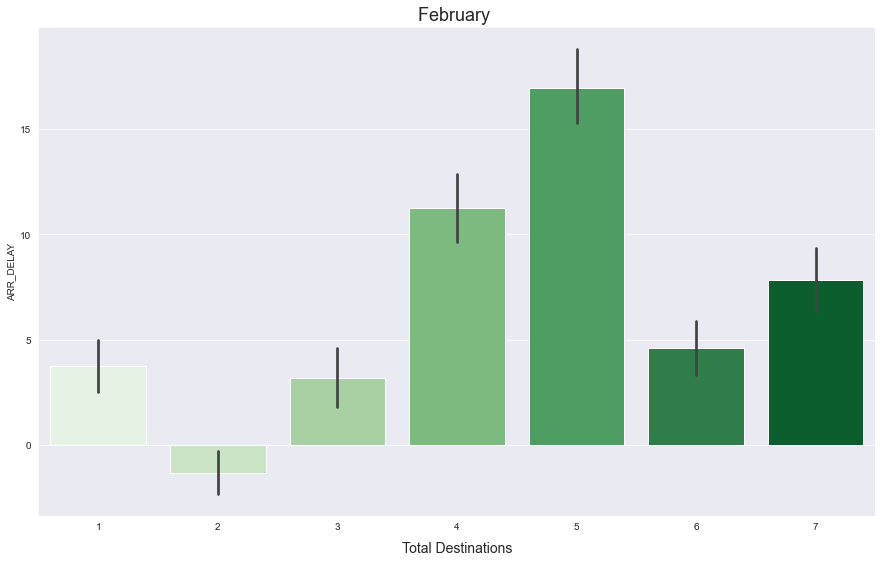

In [77]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DAY_OF_WEEK", y="ARR_DELAY", data=Flight_Feb, palette="Greens")
plt.title('February ', fontsize=18)
plt.xlabel('Total Destinations', fontsize=14, labelpad=10);
plt.show()

In [78]:
Flight_Data.shape

(741715, 27)

In [79]:
Flight_Data.isna().sum()

YEAR                   0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
MKT_UNIQUE_CARRIER     0
TAIL_NUM               0
ORIGIN                 0
ORIGIN_CITY_NAME       0
DEST                   0
DEST_CITY_NAME         0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
FLYearMonth            0
FLIGHTDATE             0
MONTH_Name             0
FLIGHT_STATUS          0
dtype: int64

In [80]:
Flight.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'MKT_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST',
       'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLIGHTDATE',
       'MONTH_Name', 'FLIGHT_STATUS'],
      dtype='object')

In [81]:
#Rearranging the Columns

Flight = Flight[['FLIGHTDATE', 'YEAR', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
                 'MONTH', 'MKT_UNIQUE_CARRIER', 'ORIGIN','DEST', 'CRS_DEP_TIME',
                 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
                 'TAXI_IN', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'ARR_DELAY',
                 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLIGHT_STATUS']]
Flight.head(5).append(Flight.tail(5))


,FLIGHTDATE,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,MONTH,MKT_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,CRS_ELAPSED_TIME,ARR_DELAY,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
1,2021-11,2021,17,3,11,United Airlines,BUF,ORD,3,19.0,31.0,4,4,18.0,4,127,30.0,138.0,89.0,473,1
2,2021-11,2021,17,3,11,United Airlines,MKE,ORD,2,-10.0,20.0,2,2,15.0,2,65,-11.0,64.0,29.0,67,0
5,2021-11,2021,17,3,11,United Airlines,PNS,ORD,3,0.0,17.0,3,4,9.0,4,159,-13.0,146.0,120.0,794,0
6,2021-11,2021,17,3,11,United Airlines,COU,ORD,2,-1.0,13.0,2,2,8.0,2,95,-18.0,78.0,57.0,315,0
7,2021-11,2021,17,3,11,United Airlines,CAE,ORD,2,-10.0,12.0,2,2,9.0,2,149,-31.0,128.0,107.0,666,0
769254,2022-03,2022,13,7,3,Southwest Airlines,BWI,DEN,4,90.0,9.0,4,4,5.0,4,245,78.0,233.0,219.0,1491,1
769256,2022-03,2022,13,7,3,Southwest Airlines,BWI,DTW,4,66.0,12.0,4,1,6.0,4,85,70.0,89.0,71.0,409,1
769257,2022-03,2022,13,7,3,Southwest Airlines,BWI,DTW,3,107.0,13.0,3,3,8.0,3,100,101.0,94.0,73.0,409,1
769269,2022-03,2022,13,7,3,Southwest Airlines,BWI,HOU,4,60.0,13.0,4,1,6.0,1,210,50.0,200.0,181.0,1246,1
769270,2022-03,2022,13,7,3,Southwest Airlines,BWI,HOU,4,128.0,10.0,4,4,14.0,4,215,118.0,205.0,181.0,1246,1


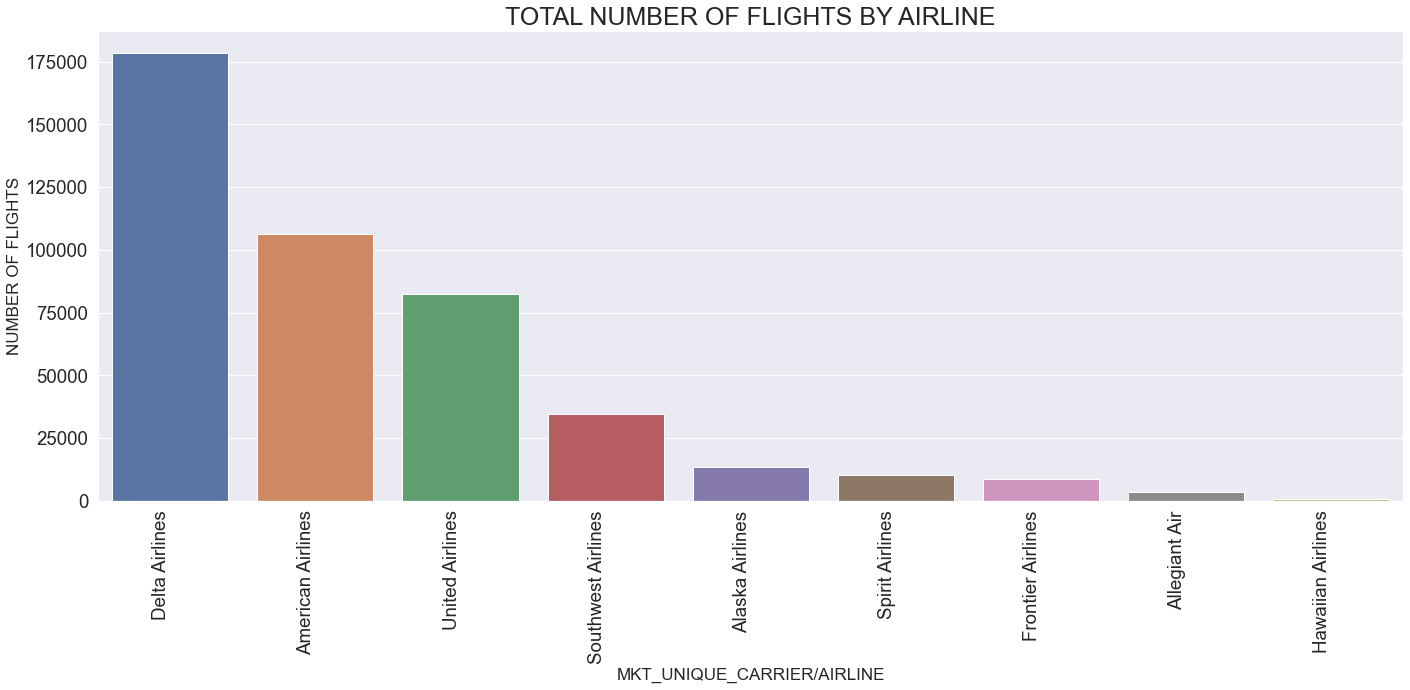

In [82]:
#Total number of Flights per airline
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.7)
axis = sns.countplot(x=Flight['MKT_UNIQUE_CARRIER'], data=Flight, order=Flight['MKT_UNIQUE_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=25)
plt.xlabel('MKT_UNIQUE_CARRIER/AIRLINE', fontsize=17)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=17)
plt.tight_layout()
plt.show()


In [83]:
Flight.MKT_UNIQUE_CARRIER.value_counts()

Delta Airlines        178387
American Airlines     106232
United Airlines        82549
Southwest Airlines     34698
Alaska Airlines        13584
Spirit Airlines        10220
Frontier Airlines       8503
Allegiant Air           3524
Hawaiian Airlines        517
Name: MKT_UNIQUE_CARRIER, dtype: int64

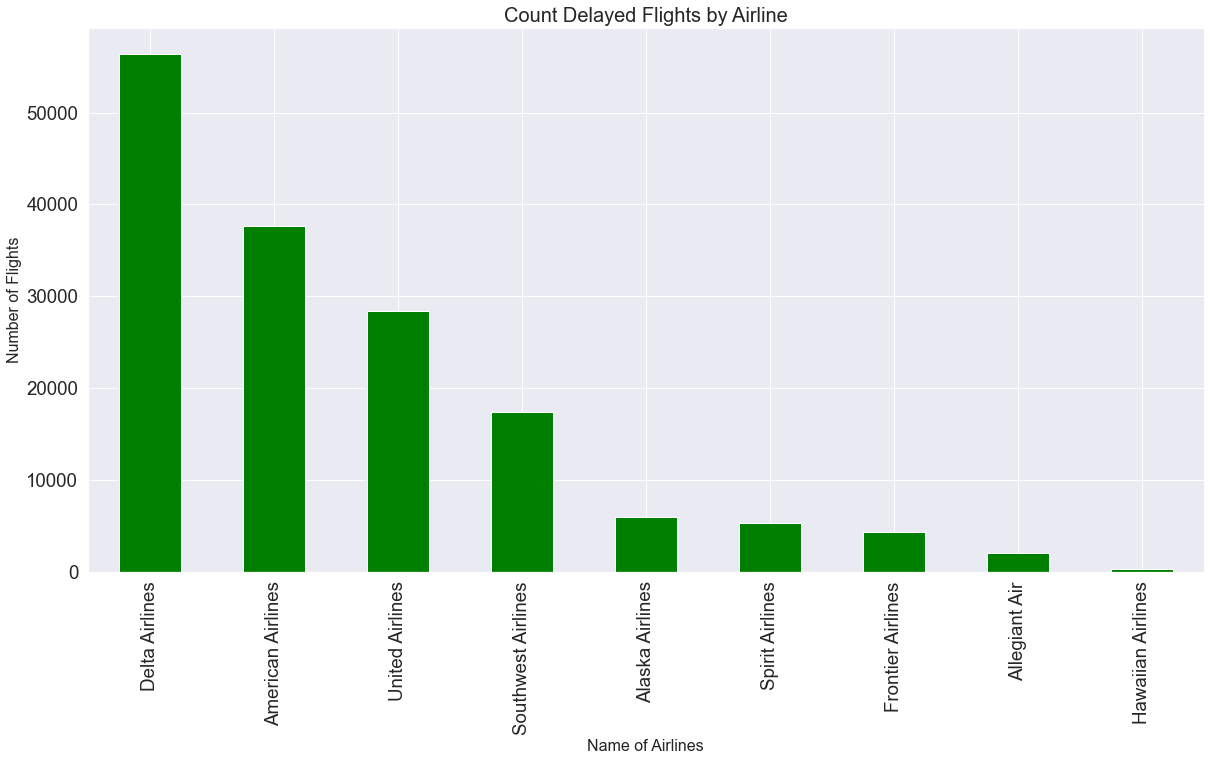

In [84]:
plt.figure(figsize=(20, 10))
Flight.groupby('MKT_UNIQUE_CARRIER').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar(color='green')
plt.title('Count Delayed Flights by Airline', fontsize=20)
plt.xlabel('Name of Airlines', fontsize=16)
plt.ylabel('Number of Flights', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [85]:

Flight.FLIGHT_STATUS.value_counts(normalize=True)

0    0.640039
1    0.359961
Name: FLIGHT_STATUS, dtype: float64

In [86]:
# 1. Creating the new dataframe with the columns of my interest
Flight_PFD = Flight[['MKT_UNIQUE_CARRIER', 'FLIGHT_STATUS']]
Flight_PFD.head()

,MKT_UNIQUE_CARRIER,FLIGHT_STATUS
1,United Airlines,1
2,United Airlines,0
5,United Airlines,0
6,United Airlines,0
7,United Airlines,0


In [87]:

# 2. Shape to check the size of the dataframe and that we have not lost any rows for any reason
Flight_PFD.shape

(438214, 2)

In [88]:
# 3. Non-normalize value_count()
Flight_PFD.FLIGHT_STATUS.value_counts()

0    280474
1    157740
Name: FLIGHT_STATUS, dtype: int64

In [89]:
T1 = Flight_PFD.groupby(['MKT_UNIQUE_CARRIER']).sum().reset_index()
T2 = Flight.MKT_UNIQUE_CARRIER.value_counts().rename_axis('MKT_UNIQUE_CARRIER').reset_index(name='TOTAL_FLIGHTS')
Flight_fp = pd.merge(T1, T2, on='MKT_UNIQUE_CARRIER')
Flight_fp['PERCENTAGE_DELAYED'] = round((Flight_fp['FLIGHT_STATUS']*100)/Flight_fp['TOTAL_FLIGHTS'], 2)
Flight_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)


Flight_fp.head(20)

,MKT_UNIQUE_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Alaska Airlines,5922,13584,43.60
1,Allegiant Air,1999,3524,56.73
2,American Airlines,37656,106232,35.45
3,Delta Airlines,56364,178387,31.60
4,Frontier Airlines,4361,8503,51.29
5,Hawaiian Airlines,260,517,50.29
6,Southwest Airlines,17440,34698,50.26
7,Spirit Airlines,5361,10220,52.46
8,United Airlines,28377,82549,34.38


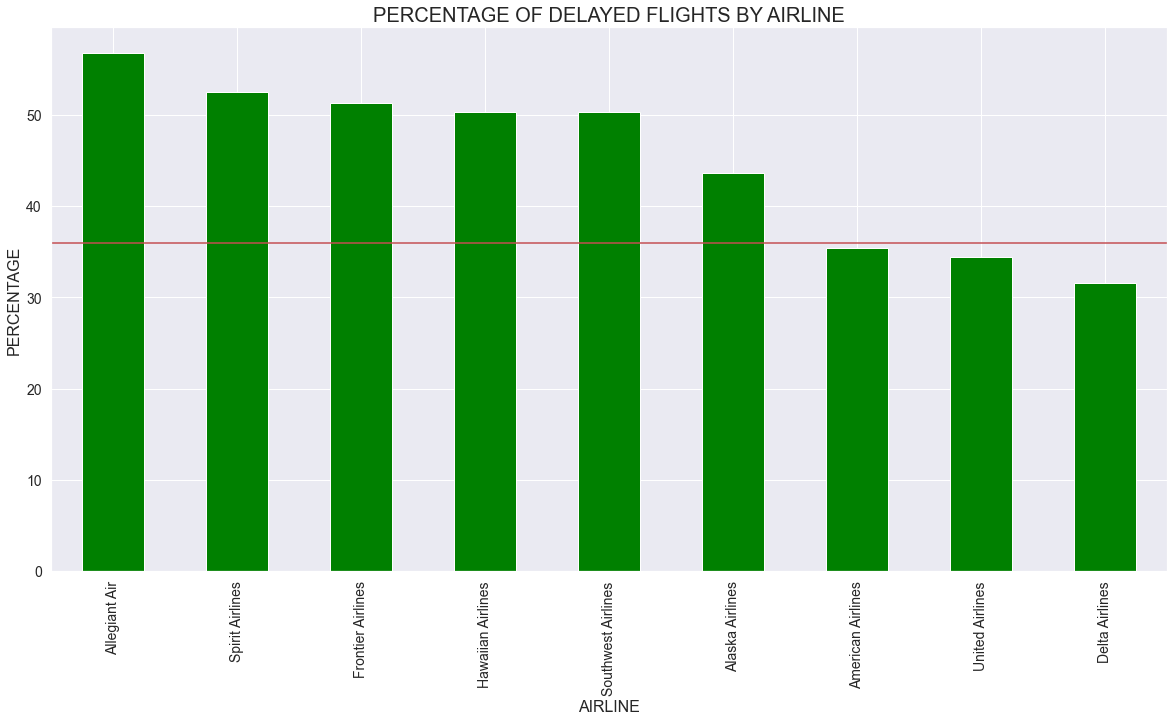

In [90]:
plt.figure(figsize=(20, 10))
Flight_fp.groupby('MKT_UNIQUE_CARRIER').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14, color="green")
plt.hlines(y=35.99, xmin=-1, xmax=18, colors='rgb', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()


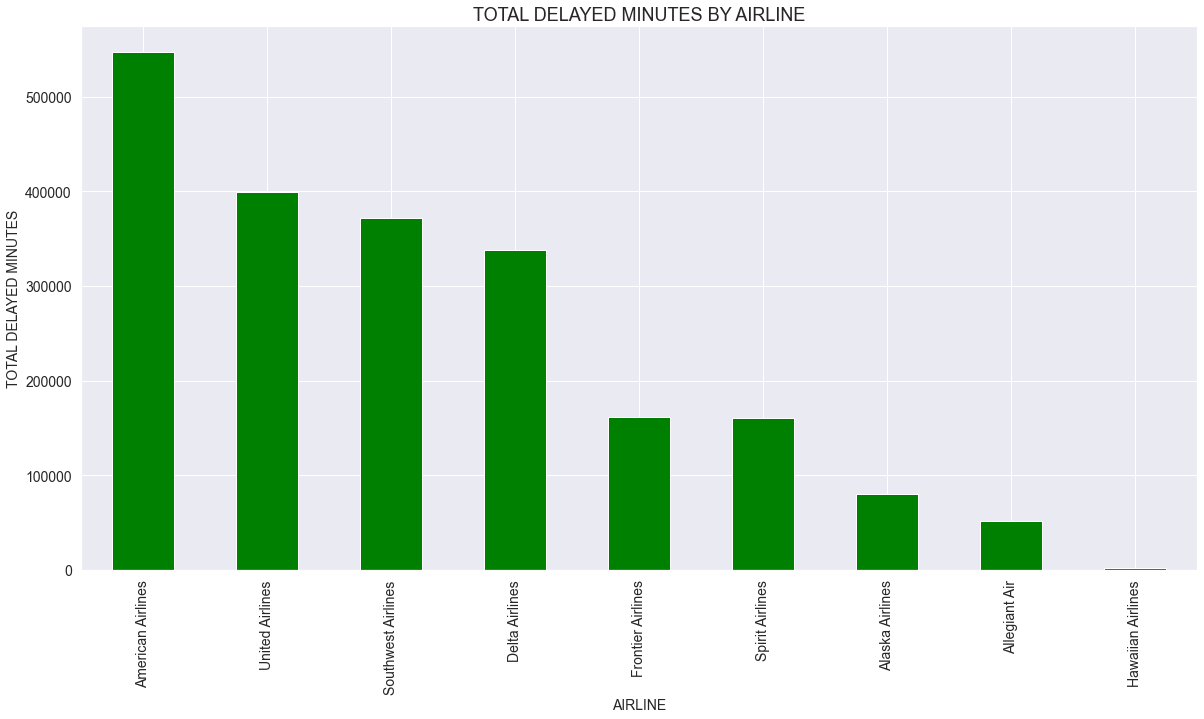

In [91]:
plt.figure(figsize=(20, 10))
Flight.groupby('MKT_UNIQUE_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar(color = 'green')
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [92]:
T3 = Flight[['MKT_UNIQUE_CARRIER', 'ARR_DELAY']]
T3 = T3.groupby(['MKT_UNIQUE_CARRIER']).mean().reset_index()
T3.rename({'ARR_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
T3 = T3.sort_values(['AVG_DELAY']).reset_index(drop=True)
T3.head(18)

,MKT_UNIQUE_CARRIER,AVG_DELAY
0,Delta Airlines,1.894791
1,Hawaiian Airlines,3.589942
2,United Airlines,4.841076
3,American Airlines,5.146557
4,Alaska Airlines,5.882288
5,Southwest Airlines,10.706237
6,Allegiant Air,14.840806
7,Spirit Airlines,15.679061
8,Frontier Airlines,19.001058


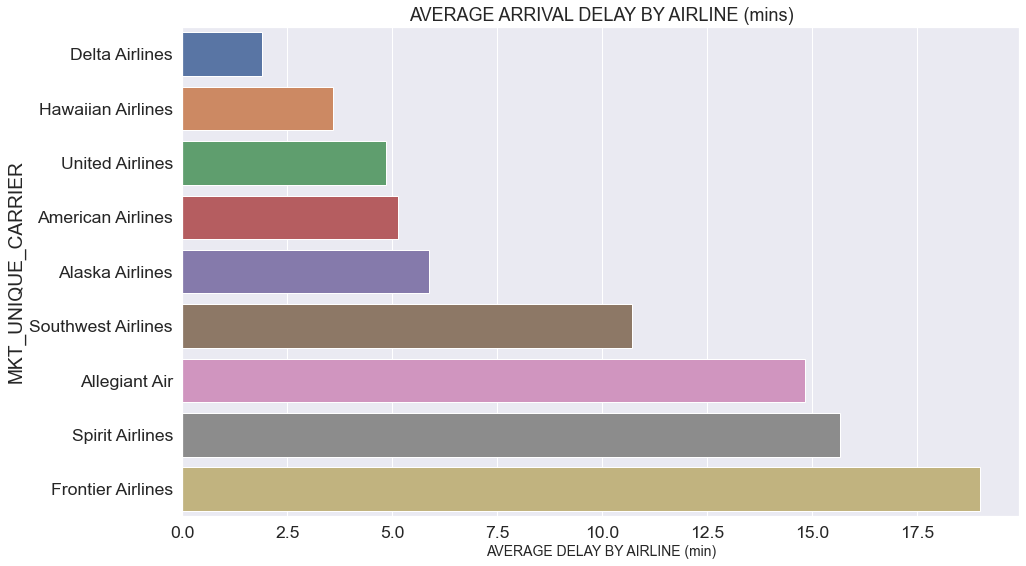

In [93]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='MKT_UNIQUE_CARRIER', data=T3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

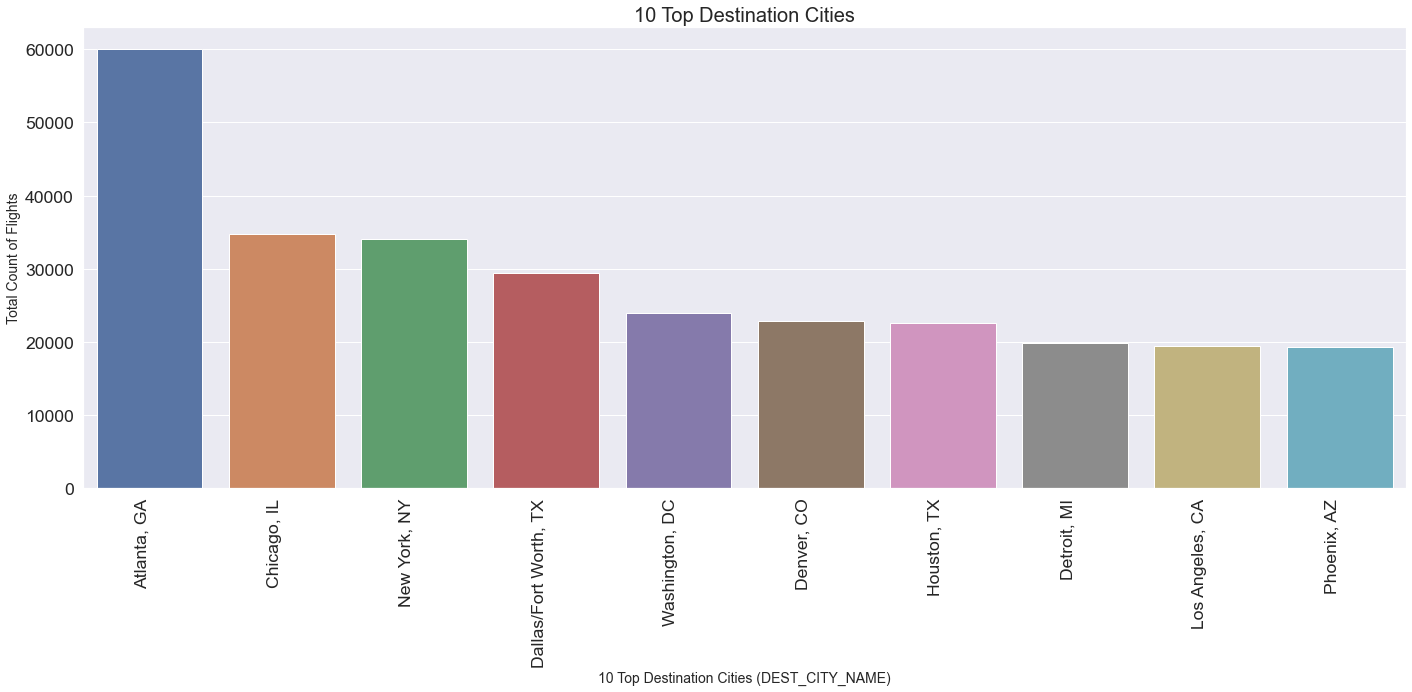

In [94]:
#Most Common destination


plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=Flight_Data['DEST_CITY_NAME'], data=Flight_Data, order=Flight_Data['DEST_CITY_NAME'].value_counts().iloc[0:10].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('10 Top Destination Cities', fontsize=20)
plt.xlabel('10 Top Destination Cities (DEST_CITY_NAME)', fontsize=14)
plt.ylabel('Total Count of Flights', fontsize=14)
plt.tight_layout()
plt.show()

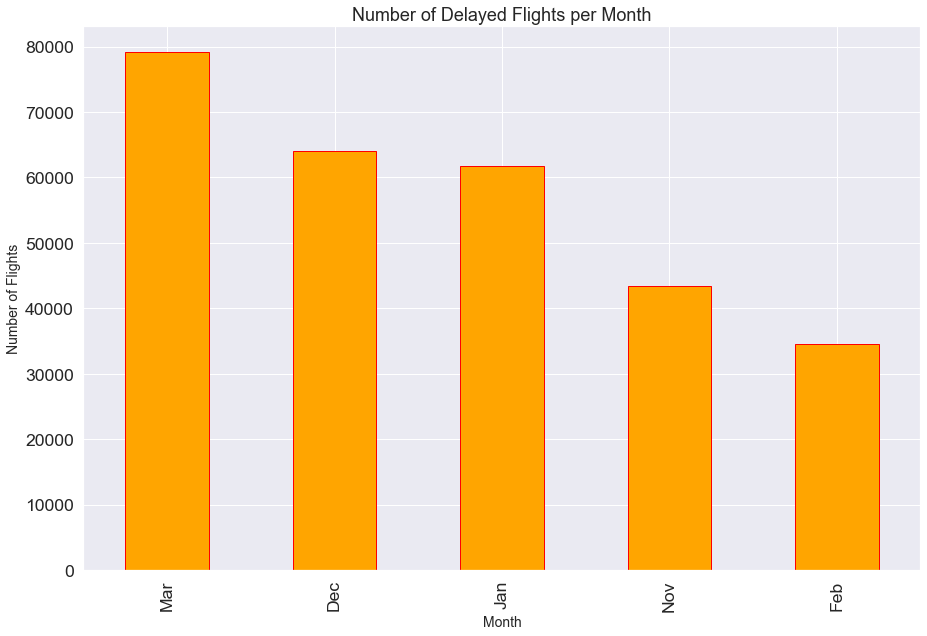

In [95]:
plt.figure(figsize=(15, 10))
Flight_Data1.groupby('MONTH_Name').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar(color='orange', edgecolor='red')
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

### Impact of Delays

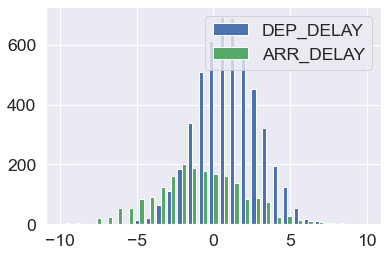

In [96]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

DEP_DELAY = np.random.normal(1, 2, 5000)
ARR_DELAY = np.random.normal(-1, 3, 2000)
bins = np.linspace(-10, 10, 30)

plt.hist([DEP_DELAY, ARR_DELAY], bins, label=['DEP_DELAY', 'ARR_DELAY'])
plt.legend(loc='upper right')
plt.show()

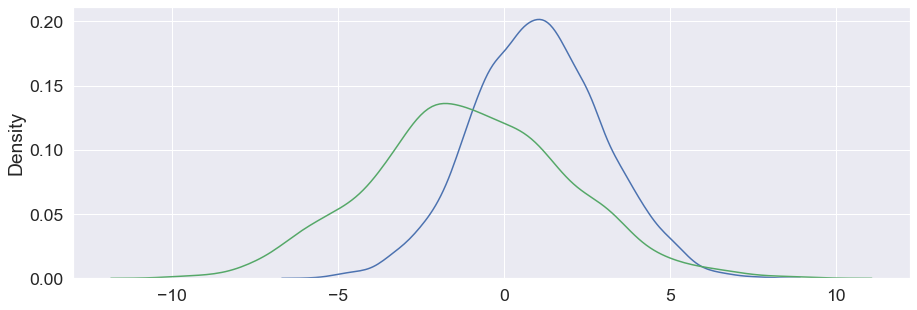

In [97]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

sns.distplot(DEP_DELAY, kde=True, ax = ax, hist=False, bins = 10)
sns.distplot(ARR_DELAY, kde=True, ax = ax, hist=False, bins = 10)

plt.show()

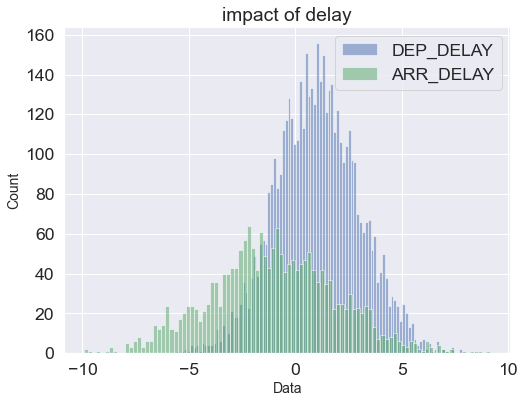

In [98]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(DEP_DELAY, bins=100, alpha=0.5, label="DEP_DELAY")
plt.hist(ARR_DELAY, bins=100, alpha=0.5, label="ARR_DELAY")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("impact of delay")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python.png")


In [99]:
T4 = Flight_Data[['DEST_CITY_NAME', 'ARR_DELAY']]
T4 = T4.groupby(['DEST_CITY_NAME']).mean().reset_index()
T4.head(10)

,DEST_CITY_NAME,ARR_DELAY
0,"Aberdeen, SD",20.033898
1,"Abilene, TX",4.527027
2,"Adak Island, AK",18.333333
3,"Aguadilla, PR",24.425532
4,"Akron, OH",4.770574
5,"Alamosa, CO",-12.815789
6,"Albany, GA",-5.914286
7,"Albany, NY",10.102659
8,"Albuquerque, NM",8.341719
9,"Alexandria, LA",4.116279


In [100]:
T4.shape

(354, 2)

In [101]:
T5 = Flight_Data.DEST_CITY_NAME.value_counts().rename_axis('DEST_CITY_NAME').reset_index(name='No_of_Flights').iloc[0:30]
T5.head(30)


,DEST_CITY_NAME,No_of_Flights
0,"Atlanta, GA",60007
1,"Chicago, IL",34708
2,"New York, NY",34013
3,"Dallas/Fort Worth, TX",29388
4,"Washington, DC",23982
5,"Denver, CO",22902
6,"Houston, TX",22648
7,"Detroit, MI",19883
8,"Los Angeles, CA",19466
9,"Phoenix, AZ",19276


In [102]:
T4_T5 = pd.merge(T5, T4, on='DEST_CITY_NAME')
T4_T5.head()

,DEST_CITY_NAME,No_of_Flights,ARR_DELAY
0,"Atlanta, GA",60007,0.555252
1,"Chicago, IL",34708,5.956725
2,"New York, NY",34013,4.080205
3,"Dallas/Fort Worth, TX",29388,4.894311
4,"Washington, DC",23982,3.860229


In [103]:
T4_T5.describe()

,No_of_Flights,ARR_DELAY
count,30.000000,30.000000
mean,17168.500000,5.605725
std,11324.620045,3.472785
min,5844.000000,-0.195603
25%,8718.500000,4.036289
50%,15596.000000,4.822413
75%,19778.750000,6.995441
max,60007.000000,14.629284


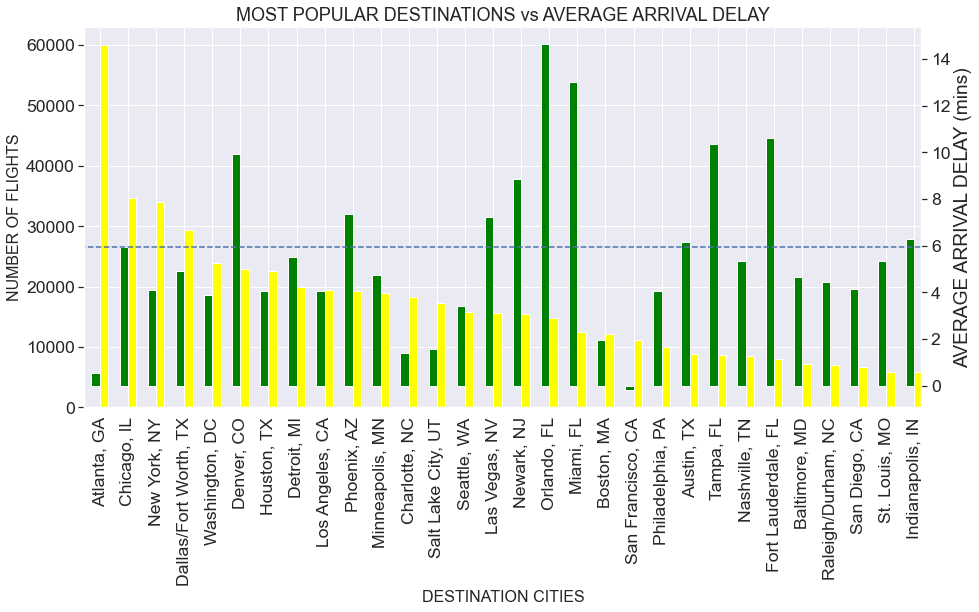

In [104]:
T4_T5 = T4_T5.set_index('DEST_CITY_NAME')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

T4_T5.No_of_Flights.plot(kind='bar',color='yellow',ax=ax, width=width, position=0)
T4_T5.ARR_DELAY.plot(kind='bar',color='green', ax=ax2, width=width, position=1)

plt.hlines(y=5.935, xmin=-1, xmax=35, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()

The dashed line that you see on the plot corresponds to the average delay on arrival of the top 30 destinations. It is interesting to see how Atlanta, having such a high the number of landings, has a very low average delay below 2 minutes, whereas Dallas, a not so popular destination, has such a high minute average delay. Orlando is another destination that stands out with a high average delay as well as Orlando and Tampa etc.

In [105]:
T6 = Flight_Data[['ORIGIN_CITY_NAME', 'DEP_DELAY']]
T6 = T6.groupby(['ORIGIN_CITY_NAME']).mean().reset_index()
T6.head()

,ORIGIN_CITY_NAME,DEP_DELAY
0,"Aberdeen, SD",22.644068
1,"Abilene, TX",6.595890
2,"Adak Island, AK",48.200000
3,"Aguadilla, PR",31.925532
4,"Akron, OH",12.638021


In [106]:
T7 = Flight_Data.ORIGIN_CITY_NAME.value_counts().rename_axis('ORIGIN_CITY_NAME').reset_index(name='No_of_Flights').iloc[0:30]
T7.head(10)


,ORIGIN_CITY_NAME,No_of_Flights
0,"Atlanta, GA",59896
1,"Chicago, IL",34554
2,"New York, NY",34034
3,"Dallas/Fort Worth, TX",29276
4,"Washington, DC",23930
5,"Denver, CO",22910
6,"Houston, TX",22812
7,"Detroit, MI",19930
8,"Los Angeles, CA",19523
9,"Phoenix, AZ",19290


In [107]:
T7_T6 = pd.merge(T7, T6, on='ORIGIN_CITY_NAME')
T7_T6.head()


,ORIGIN_CITY_NAME,No_of_Flights,DEP_DELAY
0,"Atlanta, GA",59896,7.909209
1,"Chicago, IL",34554,14.108063
2,"New York, NY",34034,9.320180
3,"Dallas/Fort Worth, TX",29276,12.456927
4,"Washington, DC",23930,10.423025


In [108]:
T7_T6.shape

(30, 3)

In [109]:
T7_T6.describe()

,No_of_Flights,DEP_DELAY
count,30.000000,30.000000
mean,17166.300000,11.949826
std,11315.863016,3.461928
min,5712.000000,5.852556
25%,8782.500000,9.301765
50%,15778.000000,12.001903
75%,19828.250000,13.822973
max,59896.000000,20.959014


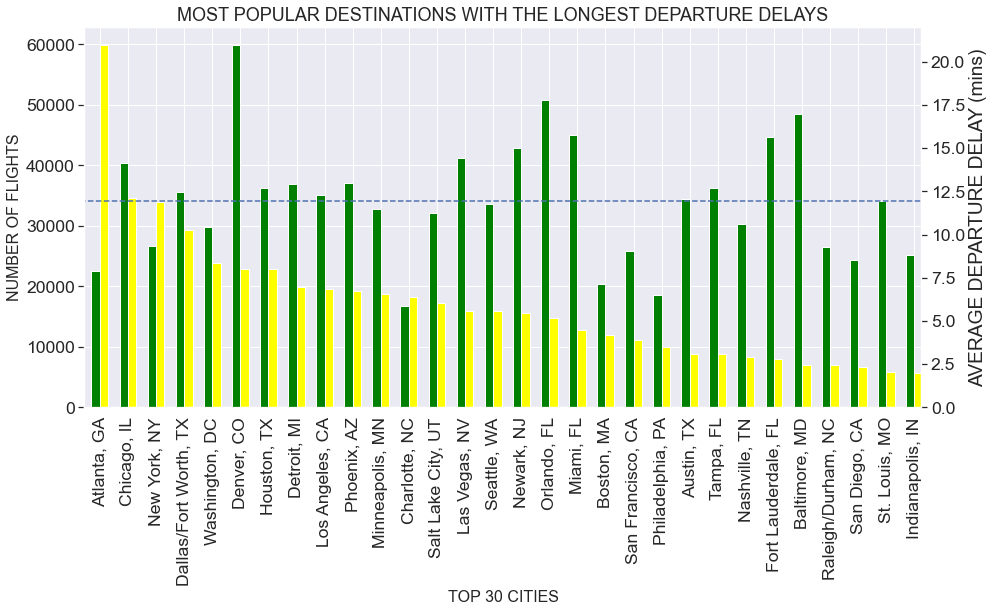

In [110]:
T7_T6 = T7_T6.set_index('ORIGIN_CITY_NAME')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

T7_T6.No_of_Flights.plot(kind='bar',color='yellow',ax=ax, width=width, position=0)
T7_T6.DEP_DELAY.plot(kind='bar',color='green', ax=ax2, width=width, position=1)

plt.hlines(y=11.949, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()

This is probably one of the most interesting plots because of the information it gives. It is clear here the importance of the DEPARTURE DELAYS for the flights arriving on time.

In [111]:
Flight_Data1.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'MKT_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST',
       'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLYearMonth',
       'FLIGHTDATE', 'MONTH_Name', 'FLIGHT_STATUS'],
      dtype='object')

In [112]:
Flight_Data1['Arrival-Departure-Delay'] = Flight_Data1['ARR_DELAY'] - Flight_Data1['DEP_DELAY']
Flight_Data1.head(5).append(Flight_Data1.tail(5))

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLYearMonth,FLIGHTDATE,MONTH_Name,FLIGHT_STATUS,Arrival-Departure-Delay
0,2021,11,17,3,2021-11-17,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",3,7.0,36.0,3,3,2.0,3,1.0,116,110.0,72.0,536,202111,2021-11,Nov,1,-6.0
1,2021,11,17,3,2021-11-17,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473,202111,2021-11,Nov,1,11.0
2,2021,11,17,3,2021-11-17,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",2,-10.0,20.0,2,2,15.0,2,-11.0,65,64.0,29.0,67,202111,2021-11,Nov,0,-1.0
3,2021,11,17,3,2021-11-17,United Airlines,N436AW,IAD,"Washington, DC",CHO,"Charlottesville, VA",3,-10.0,16.0,3,3,30.0,4,-1.0,55,64.0,18.0,77,202111,2021-11,Nov,0,9.0
4,2021,11,17,3,2021-11-17,United Airlines,N433AW,ORD,"Chicago, IL",PNS,"Pensacola, FL",3,-6.0,35.0,3,3,4.0,3,4.0,153,163.0,124.0,794,202111,2021-11,Nov,1,10.0
769266,2022,3,13,7,2022-03-13,Southwest Airlines,N8515X,BWI,"Baltimore, MD",GRR,"Grand Rapids, MI",2,18.0,10.0,2,2,5.0,2,18.0,105,105.0,90.0,528,202203,2022-03,Mar,1,0.0
769269,2022,3,13,7,2022-03-13,Southwest Airlines,N8634A,BWI,"Baltimore, MD",HOU,"Houston, TX",4,60.0,13.0,4,1,6.0,1,50.0,210,200.0,181.0,1246,202203,2022-03,Mar,1,-10.0
769270,2022,3,13,7,2022-03-13,Southwest Airlines,N8608N,BWI,"Baltimore, MD",HOU,"Houston, TX",4,128.0,10.0,4,4,14.0,4,118.0,215,205.0,181.0,1246,202203,2022-03,Mar,1,-10.0
769271,2022,3,13,7,2022-03-13,Southwest Airlines,N8517F,BWI,"Baltimore, MD",IND,"Indianapolis, IN",3,37.0,7.0,3,3,7.0,3,23.0,115,101.0,87.0,516,202203,2022-03,Mar,1,-14.0
769272,2022,3,13,7,2022-03-13,Southwest Airlines,N414WN,BWI,"Baltimore, MD",IND,"Indianapolis, IN",4,84.0,10.0,1,1,5.0,1,74.0,105,95.0,80.0,516,202203,2022-03,Mar,1,-10.0


### Distribution of Arrival and Departure Delay

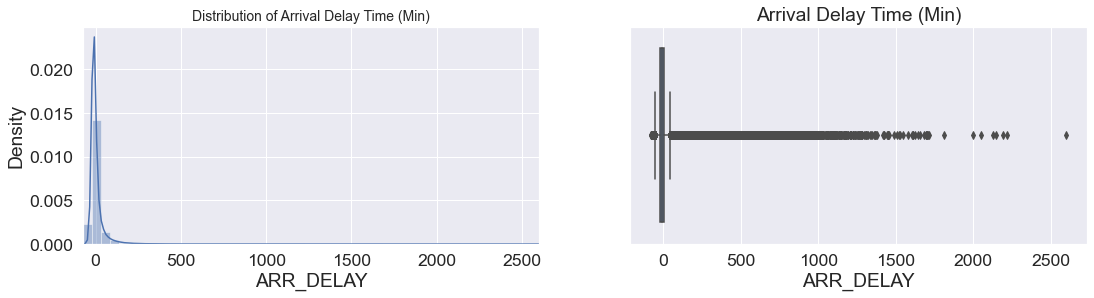

In [113]:
fig, ax = plt.subplots(1,2, figsize=(18,4));
sns.distplot(Flight['ARR_DELAY'], color='b', ax=ax[0]);
ax[0].set_title('Distribution of Arrival Delay Time (Min)', fontsize=14);
ax[0].set_xlim([min(Flight['ARR_DELAY'].values), max(Flight['ARR_DELAY'].values)]);

sns.boxplot(Flight['ARR_DELAY'], ax=ax[1]);
ax[1].set_title('Arrival Delay Time (Min)');
plt.show();

In [114]:
Flight['ARR_DELAY'].describe()

count    438214.000000
mean          4.818906
std          56.099447
min         -76.000000
25%         -17.000000
50%          -7.000000
75%           7.000000
max        2600.000000
Name: ARR_DELAY, dtype: float64

In [115]:
def outlier(Flight, col):
    ''' Remove outliers which fall outside of 3 standard deviations above and below the mean of the data set
            Input
                (0) dataframe containing the data
                (1) column to remove outliers from
            Output
                rows of df which are classified as outliers in the specified column are directly removed
                print out stating count of outliers removed '''
    mean, cutoff = np.mean(Flight[col]), np.std(Flight[col]) * 3
    lower, upper = mean - cutoff, mean + cutoff
    outliers = [x for x in Flight[col] if x < lower or x > upper]
    Flight.drop(Flight[(Flight[col] > upper) | (Flight[col] < lower)].index, inplace=True)
    return f'{len(outliers)} outliers removed'


In [116]:
outlier(Flight, 'ARR_DELAY')

'6228 outliers removed'

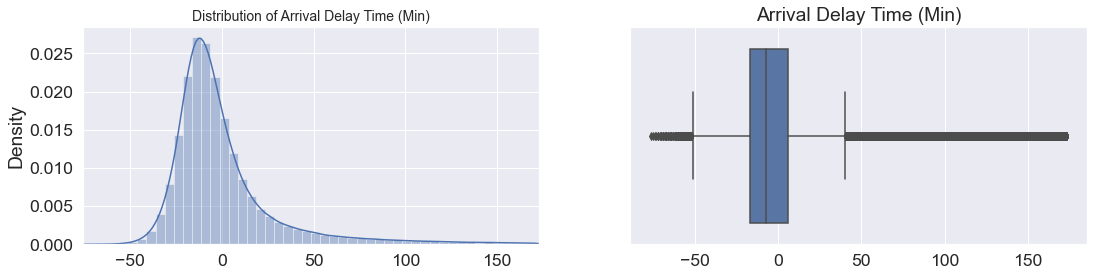

In [117]:
ARR_DELAY = Flight['ARR_DELAY'].values

fig, ax = plt.subplots(1,2, figsize=(18,4));
sns.distplot(ARR_DELAY, color='b', ax=ax[0]);
ax[0].set_title('Distribution of Arrival Delay Time (Min)', fontsize=14);
ax[0].set_xlim([min(ARR_DELAY), max(ARR_DELAY)]);

sns.boxplot(ARR_DELAY, ax=ax[1]);
ax[1].set_title('Arrival Delay Time (Min)');
plt.show();


In [118]:
Flight['ARR_DELAY'].describe()

count    431986.000000
mean          0.134995
std          29.739841
min         -76.000000
25%         -17.000000
50%          -7.000000
75%           6.000000
max         173.000000
Name: ARR_DELAY, dtype: float64

<AxesSubplot:xlabel='FLIGHT_STATUS', ylabel='count'>

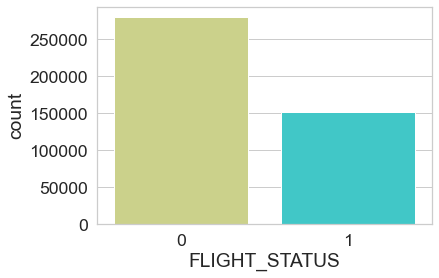

In [119]:
sns.set_style('whitegrid')
sns.countplot(x='FLIGHT_STATUS',data=Flight,palette='rainbow_r')

In [120]:
Flight.FLIGHT_STATUS.value_counts()

0    280474
1    151512
Name: FLIGHT_STATUS, dtype: int64

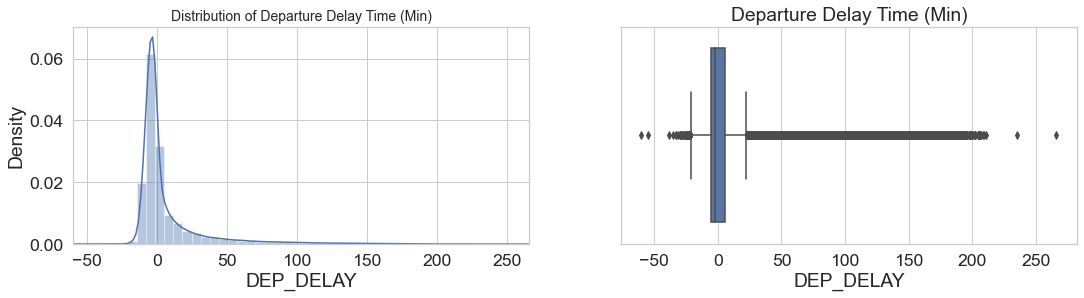

In [121]:
fig, ax = plt.subplots(1,2, figsize=(18,4));
sns.distplot(Flight['DEP_DELAY'], color='b', ax=ax[0]);
ax[0].set_title('Distribution of Departure Delay Time (Min)', fontsize=14);
ax[0].set_xlim([min(Flight['DEP_DELAY'].values), max(Flight['DEP_DELAY'].values)]);

sns.boxplot(Flight['DEP_DELAY'], ax=ax[1]);
ax[1].set_title('Departure Delay Time (Min)');
plt.show();


In [122]:
def outlier_dep(Flight, col):
    ''' Remove outliers which fall outside of 3 standard deviations above and below the mean of the data set
            Input
                (0) dataframe containing the data
                (1) column to remove outliers from
            Output
                rows of df which are classified as outliers in the specified column are directly removed
                print out stating count of outliers removed '''
    mean, cutoff = np.mean(Flight[col]), np.std(Flight[col]) * 3   # 3 stddev outside the mean
    lower, upper = mean - cutoff, mean + cutoff
    outliers = [x for x in Flight[col] if x < lower or x > upper]
    Flight.drop(Flight[(Flight[col] > upper) | (Flight[col] < lower)].index, inplace=True)
    return f'{len(outliers)} outliers removed'


In [123]:
outlier_dep(Flight, 'DEP_DELAY')


'12500 outliers removed'

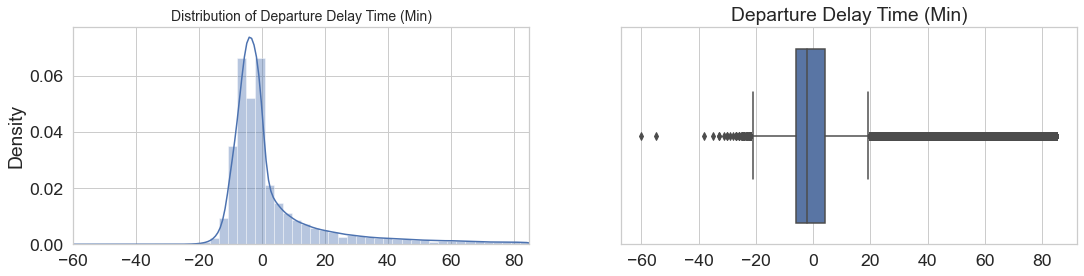

In [124]:
DEP_DELAY = Flight['DEP_DELAY'].values

fig, ax = plt.subplots(1,2, figsize=(18,4));
sns.distplot(DEP_DELAY, color='b', ax=ax[0]);
ax[0].set_title('Distribution of Departure Delay Time (Min)', fontsize=14);
ax[0].set_xlim([min(DEP_DELAY), max(DEP_DELAY)]);

sns.boxplot(DEP_DELAY, ax=ax[1]);
ax[1].set_title('Departure Delay Time (Min)');
plt.show();


In [125]:
#Function that classifies delay into 5 sections
def classify(num):
    if (num < 0):
        if (num < -30):
            return ('Early: > 30 mins') 
        else:
            return ('Early: < 30 mins')
    else:
            if (num < 30):
                return ('Late: < 30 mins')
            elif (num < 250):
                return ('Late: < 5 hours')
            else:
                return ('Late: > 5 hours')


#Creating new column for delay group
arr_flight = Flight_Data1[['ORIGIN', 'DEST', 'ARR_DELAY']]
arr_flight['Delay Amount'] = arr_flight['ARR_DELAY'].apply(lambda x: classify(x))

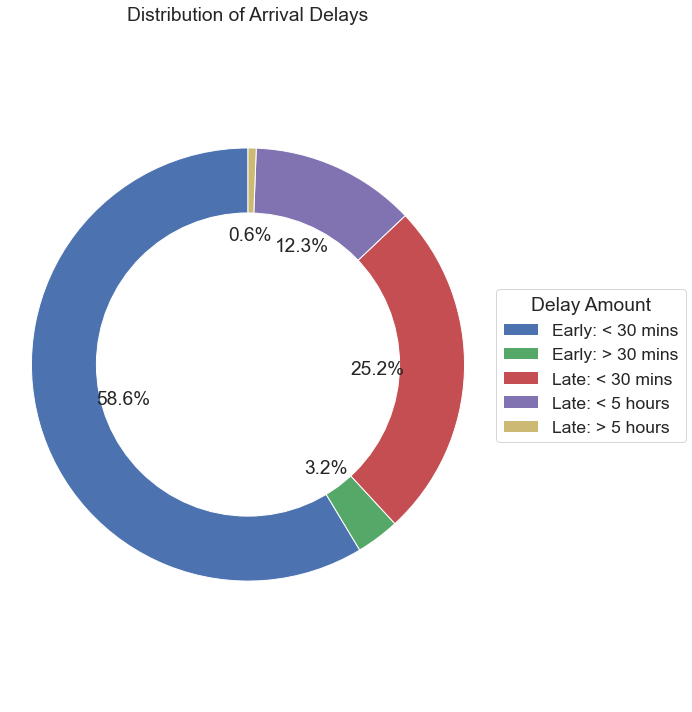

In [126]:
#Plotting Pie Chart
import matplotlib.pyplot as plt

arr_count = pd.DataFrame({'Count' : arr_flight.groupby([ "Delay Amount"] ).size()}).reset_index()

total = arr_count['Count'].sum()
arr_count['Percent'] = arr_count['Count'].apply(lambda x: (x / total) * 100) 
arr_count.sort_values('Count', ascending=True)

# Pie chart
labels = arr_count['Delay Amount']
sizes = arr_count['Percent']
#colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05, 0.5)


fig1, ax1 = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90)


#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.legend(wedges, labels,
          title="Delay Amount",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

plt.setp(texts, size=8, weight="bold")

ax1.set_title("Distribution of Arrival Delays")

plt.show()

In [127]:
Flight_Data1.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLYearMonth,FLIGHTDATE,MONTH_Name,FLIGHT_STATUS,Arrival-Departure-Delay
0,2021,11,17,3,2021-11-17,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",3,7.0,36.0,3,3,2.0,3,1.0,116,110.0,72.0,536,202111,2021-11,Nov,1,-6.0
1,2021,11,17,3,2021-11-17,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473,202111,2021-11,Nov,1,11.0
2,2021,11,17,3,2021-11-17,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",2,-10.0,20.0,2,2,15.0,2,-11.0,65,64.0,29.0,67,202111,2021-11,Nov,0,-1.0
3,2021,11,17,3,2021-11-17,United Airlines,N436AW,IAD,"Washington, DC",CHO,"Charlottesville, VA",3,-10.0,16.0,3,3,30.0,4,-1.0,55,64.0,18.0,77,202111,2021-11,Nov,0,9.0
4,2021,11,17,3,2021-11-17,United Airlines,N433AW,ORD,"Chicago, IL",PNS,"Pensacola, FL",3,-6.0,35.0,3,3,4.0,3,4.0,153,163.0,124.0,794,202111,2021-11,Nov,1,10.0


### Feature Selection

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [129]:
Flight_Data1.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLYearMonth,FLIGHTDATE,MONTH_Name,FLIGHT_STATUS,Arrival-Departure-Delay
0,2021,11,17,3,2021-11-17,United Airlines,N442AW,ORD,"Chicago, IL",AVL,"Asheville, NC",3,7.0,36.0,3,3,2.0,3,1.0,116,110.0,72.0,536,202111,2021-11,Nov,1,-6.0
1,2021,11,17,3,2021-11-17,United Airlines,N423AW,BUF,"Buffalo, NY",ORD,"Chicago, IL",3,19.0,31.0,4,4,18.0,4,30.0,127,138.0,89.0,473,202111,2021-11,Nov,1,11.0
2,2021,11,17,3,2021-11-17,United Airlines,N438AW,MKE,"Milwaukee, WI",ORD,"Chicago, IL",2,-10.0,20.0,2,2,15.0,2,-11.0,65,64.0,29.0,67,202111,2021-11,Nov,0,-1.0
3,2021,11,17,3,2021-11-17,United Airlines,N436AW,IAD,"Washington, DC",CHO,"Charlottesville, VA",3,-10.0,16.0,3,3,30.0,4,-1.0,55,64.0,18.0,77,202111,2021-11,Nov,0,9.0
4,2021,11,17,3,2021-11-17,United Airlines,N433AW,ORD,"Chicago, IL",PNS,"Pensacola, FL",3,-6.0,35.0,3,3,4.0,3,4.0,153,163.0,124.0,794,202111,2021-11,Nov,1,10.0


In [130]:
le = LabelEncoder()

In [131]:
Flight_Data1['MKT_UNIQUE_CARRIER']= le.fit_transform(Flight_Data1['MKT_UNIQUE_CARRIER'])
Flight_Data1['ORIGIN_CITY_NAME'] = le.fit_transform(Flight_Data1['ORIGIN_CITY_NAME'])
Flight_Data1['DEST_CITY_NAME'] = le.fit_transform(Flight_Data1['DEST_CITY_NAME'])


In [132]:
Flight_Data1 = Flight_Data1.drop(['CRS_DEP_TIME','CRS_ARR_TIME', 'FL_DATE'], axis = 1)


In [133]:
Flight_Data1 = Flight_Data1.drop(['TAIL_NUM','ORIGIN', 'DEST', 'FLYearMonth', 'FLIGHTDATE', 'MONTH_Name'], axis = 1)


In [134]:
Flight_Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741715 entries, 0 to 769272
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YEAR                     741715 non-null  int64  
 1   MONTH                    741715 non-null  int64  
 2   DAY_OF_MONTH             741715 non-null  int64  
 3   DAY_OF_WEEK              741715 non-null  int64  
 4   MKT_UNIQUE_CARRIER       741715 non-null  int64  
 5   ORIGIN_CITY_NAME         741715 non-null  int64  
 6   DEST_CITY_NAME           741715 non-null  int64  
 7   DEP_DELAY                741715 non-null  float64
 8   TAXI_OUT                 741715 non-null  float64
 9   WHEELS_OFF               741715 non-null  int64  
 10  WHEELS_ON                741715 non-null  int64  
 11  TAXI_IN                  741715 non-null  float64
 12  ARR_DELAY                741715 non-null  float64
 13  CRS_ELAPSED_TIME         741715 non-null  int64  
 14  ACTU

In [135]:
Flight_Data1 = Flight_Data1.drop(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'WHEELS_OFF', 'WHEELS_ON', 'FLIGHT_STATUS', 'Arrival-Departure-Delay'], axis = 1)



In [136]:
Flight_Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741715 entries, 0 to 769272
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_WEEK          741715 non-null  int64  
 1   MKT_UNIQUE_CARRIER   741715 non-null  int64  
 2   ORIGIN_CITY_NAME     741715 non-null  int64  
 3   DEST_CITY_NAME       741715 non-null  int64  
 4   DEP_DELAY            741715 non-null  float64
 5   TAXI_OUT             741715 non-null  float64
 6   TAXI_IN              741715 non-null  float64
 7   ARR_DELAY            741715 non-null  float64
 8   CRS_ELAPSED_TIME     741715 non-null  int64  
 9   ACTUAL_ELAPSED_TIME  741715 non-null  float64
 10  AIR_TIME             741715 non-null  float64
 11  DISTANCE             741715 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 73.6 MB


<AxesSubplot:>

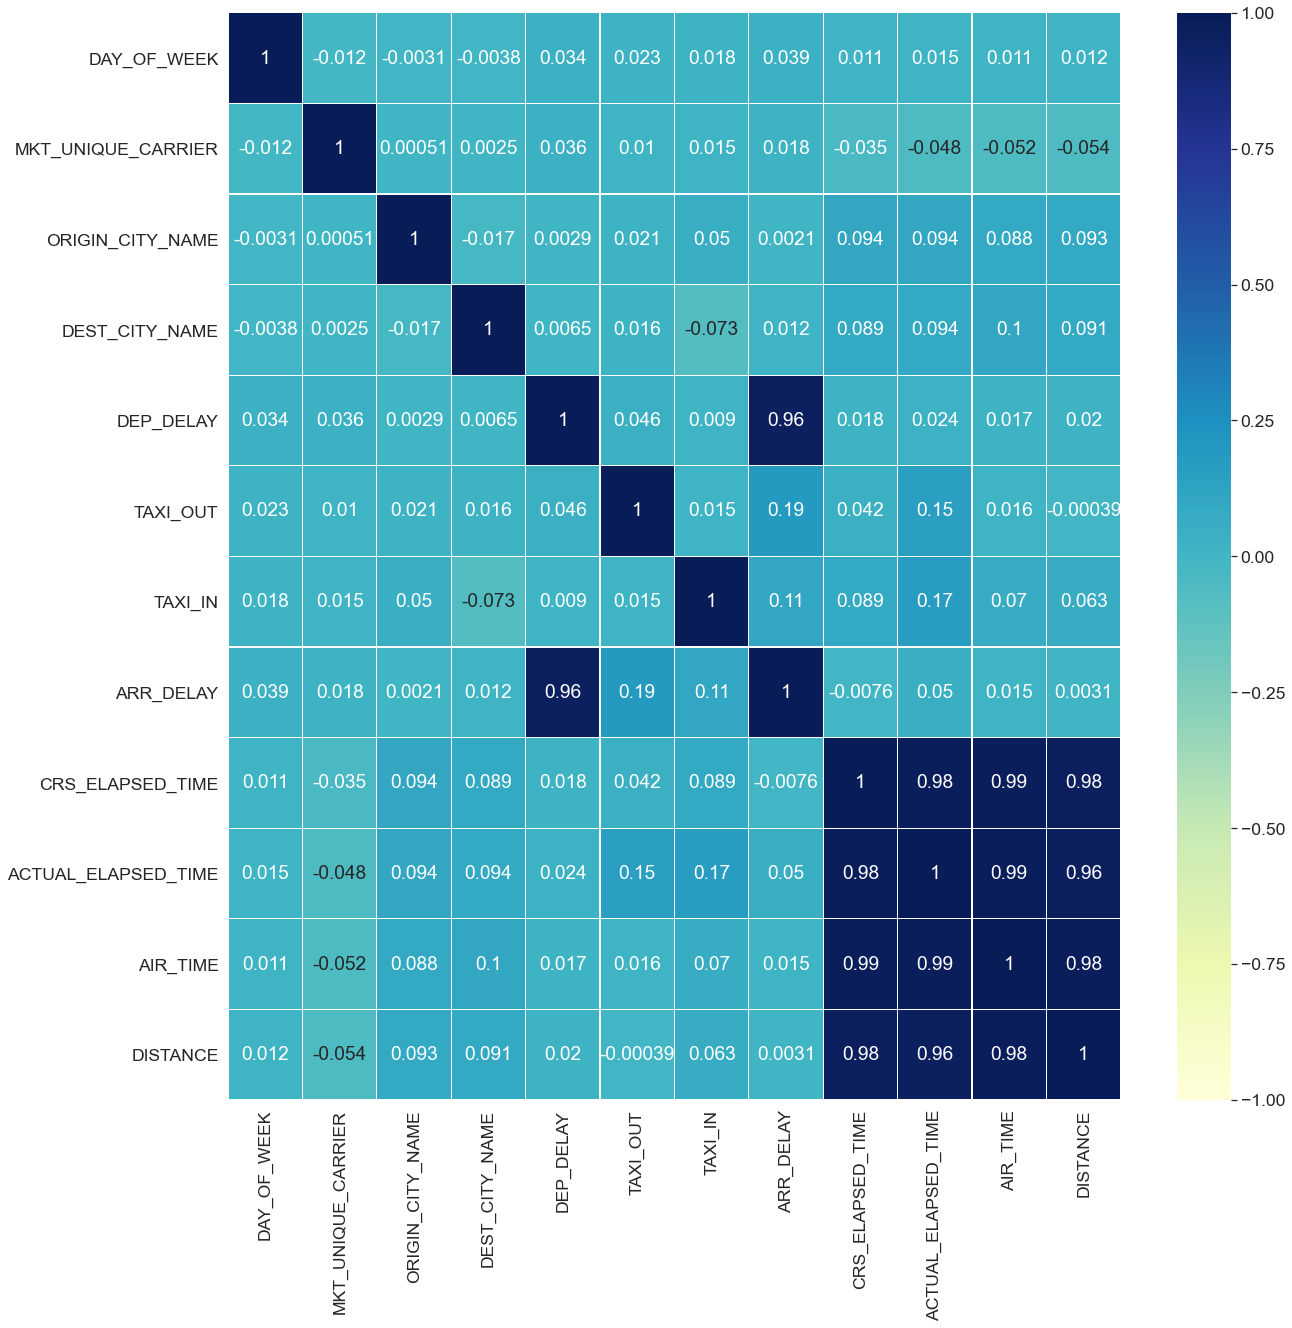

In [137]:
plt.figure(figsize =(20,20))
sns.heatmap(Flight_Data1.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

### Train and Test Data Split

In [138]:
X = Flight_Data1.drop('ARR_DELAY',axis = 1)
X.shape

(741715, 11)

In [139]:
y = Flight_Data1['ARR_DELAY']
y.head()

0     1.0
1    30.0
2   -11.0
3    -1.0
4     4.0
Name: ARR_DELAY, dtype: float64

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

### Normalization

In [141]:
scale = StandardScaler()
X_train_sc=scale.fit_transform(X_train)
X_test_sc=scale.transform(X_test)

## Regression Analysis

### Random Forest Regressor

In [142]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
Rfc = RandomForestRegressor(random_state=2)
fitResultR = Rfc.fit(X_train_sc,y_train)
predictedValues = fitResultR.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 2.1568324264273655
MSE: 19.60047410383489
RMSE: 4.427242268482141
R2: 0.9932953328943313


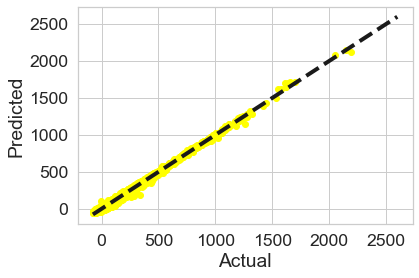

In [143]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues, color = 'yellow')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

### Decision Tree Regressor

In [144]:
from sklearn.tree import DecisionTreeRegressor
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train_sc,y_train)
predictedValues = fitResultdtc.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 3.6362057714812677
MSE: 45.85800495068193
RMSE: 6.771853878420734
R2: 0.9843135091684196


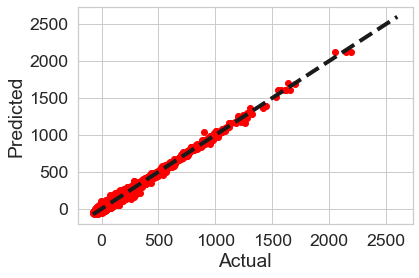

In [145]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues, color = 'red')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

### MLP Regressor

In [146]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=16)

mlp.fit(X_train_sc, y_train)

predictedValues = mlp.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))


MAE: 0.009542086899089919
MSE: 0.032304905524669456
RMSE: 0.1797356545726792
R2: 0.9999889495715116


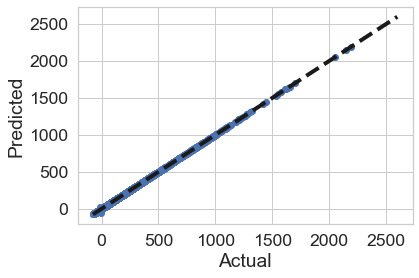

In [147]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

## Dropping Departure delay from set of attributes to try and predict Arrival Delay


### Train and Test Data Split

In [148]:
X = Flight_Data1.drop(['ARR_DELAY','DEP_DELAY'],axis = 1)
X.shape

(741715, 10)

In [149]:
y = Flight_Data1['DEP_DELAY']
y.head()

0     7.0
1    19.0
2   -10.0
3   -10.0
4    -6.0
Name: DEP_DELAY, dtype: float64

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)


### Normalizaton

In [151]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)


### MLP regressor

In [152]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=16)

mlp.fit(X_train_sc, y_train)

predictedValues = mlp.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 22.3121708534146
MSE: 2664.288723257219
RMSE: 51.61674847621864
R2: 0.013185728181156597


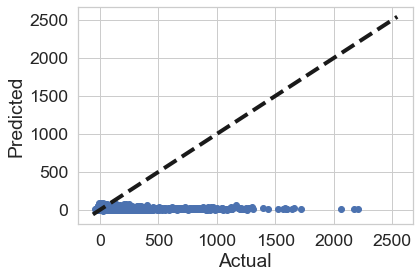

In [153]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

### Random Forest Regressor

In [154]:
fitResultR = Rfc.fit(X_train_sc,y_train)
predictedValues = fitResultR.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 24.290457065670193
MSE: 2853.06088620591
RMSE: 53.414051392923845
R2: -0.056732769350199996


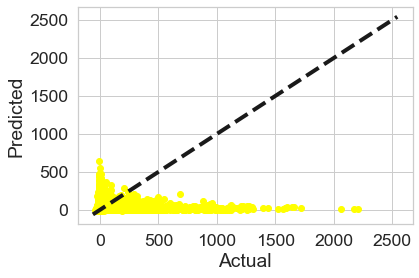

In [155]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues, color = 'yellow')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

### Decision Tree Regressor

In [156]:
from sklearn.tree import DecisionTreeRegressor
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train_sc,y_train)
predictedValues = fitResultdtc.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 30.195671478930837
MSE: 5791.956284705557
RMSE: 76.10490315811168
R2: -1.145257409080918


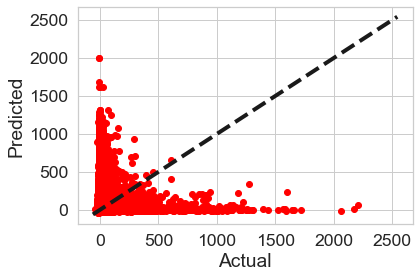

In [157]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues, color = 'red')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

## Classification Analysis

In [158]:
X_test

,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,TAXI_OUT,TAXI_IN,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
212369,2,2,80,23,34.0,5.0,218,232.0,193.0,1271
495820,2,3,227,24,17.0,4.0,69,62.0,41.0,184
340785,5,3,210,227,25.0,6.0,175,163.0,132.0,1008
495343,4,3,88,35,9.0,3.0,85,63.0,51.0,378
551016,5,2,128,59,27.0,19.0,65,76.0,30.0,83
...,...,...,...,...,...,...,...,...,...,...
578167,2,0,242,304,25.0,8.0,385,378.0,345.0,2554
645793,4,3,256,19,11.0,9.0,111,95.0,75.0,526
165280,7,3,75,41,21.0,10.0,116,116.0,85.0,640
12342,5,8,340,210,23.0,5.0,177,157.0,129.0,908


In [159]:
Flight_Data1

,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,3,8,63,16,7.0,36.0,2.0,1.0,116,110.0,72.0,536
1,3,8,47,63,19.0,31.0,18.0,30.0,127,138.0,89.0,473
2,3,8,209,63,-10.0,20.0,15.0,-11.0,65,64.0,29.0,67
3,3,8,340,60,-10.0,16.0,30.0,-1.0,55,64.0,18.0,77
4,3,8,63,249,-6.0,35.0,4.0,4.0,153,163.0,124.0,794
...,...,...,...,...,...,...,...,...,...,...,...,...
769266,7,6,24,125,18.0,10.0,5.0,18.0,105,105.0,90.0,528
769269,7,6,24,148,60.0,13.0,6.0,50.0,210,200.0,181.0,1246
769270,7,6,24,148,128.0,10.0,14.0,118.0,215,205.0,181.0,1246
769271,7,6,24,151,37.0,7.0,7.0,23.0,115,101.0,87.0,516


In [160]:
Flight_Data1['ORIGIN_CITY_NAME'] = Flight_Data1['ORIGIN_CITY_NAME'].astype(str)
Flight_Data1['DEST_CITY_NAME'] = Flight_Data1['DEST_CITY_NAME'].astype(str)

In [161]:
Flight_Data1['MKT_UNIQUE_CARRIER']= le.fit_transform(Flight_Data1['MKT_UNIQUE_CARRIER'])
Flight_Data1['ORIGIN_CITY_NAME'] = le.fit_transform(Flight_Data1['ORIGIN_CITY_NAME'])
Flight_Data1['DEST_CITY_NAME'] = le.fit_transform(Flight_Data1['DEST_CITY_NAME'])

In [162]:
Flight_Data1['Is_Delayed'] = np.where(Flight_Data1['ARR_DELAY']<=0, 0,1)

In [163]:
Flight_Data1

,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Is_Delayed
0,3,8,315,68,7.0,36.0,2.0,1.0,116,110.0,72.0,536,1
1,3,8,297,314,19.0,31.0,18.0,30.0,127,138.0,89.0,473,1
2,3,8,123,314,-10.0,20.0,15.0,-11.0,65,64.0,29.0,67,0
3,3,8,269,311,-10.0,16.0,30.0,-1.0,55,64.0,18.0,77,0
4,3,8,315,167,-6.0,35.0,4.0,4.0,153,163.0,124.0,794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769266,7,6,157,30,18.0,10.0,5.0,18.0,105,105.0,90.0,528,1
769269,7,6,157,55,60.0,13.0,6.0,50.0,210,200.0,181.0,1246,1
769270,7,6,157,55,128.0,10.0,14.0,118.0,215,205.0,181.0,1246,1
769271,7,6,157,59,37.0,7.0,7.0,23.0,115,101.0,87.0,516,1


In [164]:
X = Flight_Data1.drop(['ARR_DELAY','Is_Delayed'],axis = 1)
X.shape
y = Flight_Data1['Is_Delayed']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Is_Delayed, dtype: int64

In [165]:
X

,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,3,8,315,68,7.0,36.0,2.0,116,110.0,72.0,536
1,3,8,297,314,19.0,31.0,18.0,127,138.0,89.0,473
2,3,8,123,314,-10.0,20.0,15.0,65,64.0,29.0,67
3,3,8,269,311,-10.0,16.0,30.0,55,64.0,18.0,77
4,3,8,315,167,-6.0,35.0,4.0,153,163.0,124.0,794
...,...,...,...,...,...,...,...,...,...,...,...
769266,7,6,157,30,18.0,10.0,5.0,105,105.0,90.0,528
769269,7,6,157,55,60.0,13.0,6.0,210,200.0,181.0,1246
769270,7,6,157,55,128.0,10.0,14.0,215,205.0,181.0,1246
769271,7,6,157,59,37.0,7.0,7.0,115,101.0,87.0,516


In [166]:
y

0         1
1         1
2         0
3         0
4         1
         ..
769266    1
769269    1
769270    1
769271    1
769272    1
Name: Is_Delayed, Length: 741715, dtype: int64

In [167]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [168]:
y_train.value_counts()

0    330963
1    188237
Name: Is_Delayed, dtype: int64

### Importing Libraries

In [169]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.optimize import curve_fit
from sklearn.svm import SVC
from random import sample

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

### SMOTE Technique

In [170]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

In [171]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [172]:
pd.Series(y_train).value_counts()

0    330963
1    330963
Name: Is_Delayed, dtype: int64

### Normalization

In [173]:
sc11=StandardScaler()
X_train_sc=sc11.fit_transform(X_train)
X_test_sc=sc11.transform(X_test)

In [174]:
y_train

0         0
1         1
2         0
3         1
4         1
         ..
661921    1
661922    1
661923    1
661924    1
661925    1
Name: Is_Delayed, Length: 661926, dtype: int64

In [175]:
X_test

,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
386403,3,8,19,143,-7.0,13.0,3.0,172,158.0,142.0,1068
10264,2,8,229,267,-8.0,10.0,6.0,69,63.0,47.0,189
294389,6,2,24,333,-12.0,10.0,10.0,78,65.0,45.0,312
345221,2,3,27,125,-6.0,19.0,10.0,84,75.0,46.0,284
330833,6,3,106,202,-3.0,12.0,5.0,89,79.0,62.0,373
...,...,...,...,...,...,...,...,...,...,...,...
424570,1,8,55,39,17.0,30.0,15.0,173,185.0,140.0,886
161577,2,8,144,341,-6.0,62.0,9.0,133,159.0,88.0,488
470470,2,3,208,159,-4.0,29.0,8.0,254,263.0,226.0,1931
388001,2,8,253,106,-9.0,16.0,9.0,347,318.0,293.0,2158


## Base line tree

In [176]:
# Build regular tree as baseline
Tree_Flight = DecisionTreeClassifier(criterion='gini', max_depth=5)
Tree_Flight.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [177]:
Tree_Flight.feature_importances_

array([0.        , 0.00202488, 0.        , 0.        , 0.7507316 ,
       0.16371976, 0.07080493, 0.00117598, 0.01154285, 0.        ,
       0.        ])

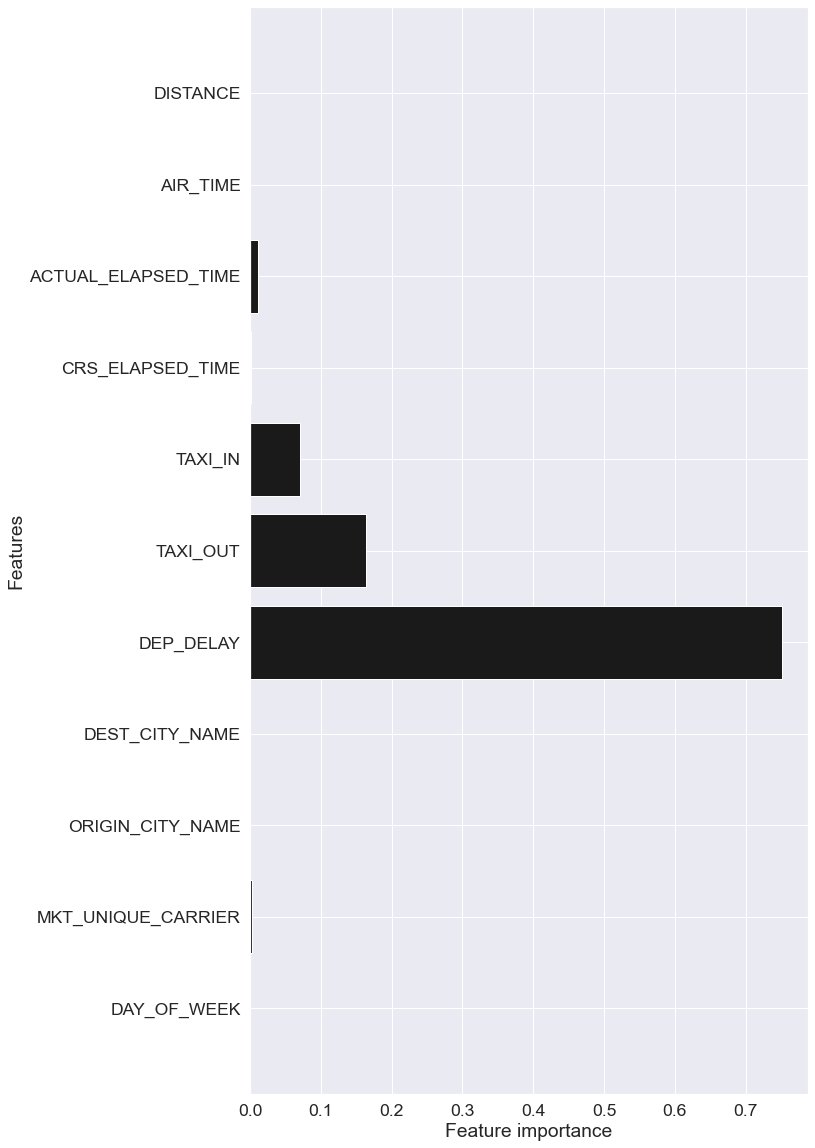

In [178]:
def Feature_imp(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 20))
    plt.barh(range(n_features), model.feature_importances_, color='k', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.grid(True)
Feature_imp(Tree_Flight)


In [179]:
# Test set predictions
Prediction = Tree_Flight.predict(X_test)

In [180]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
pd.crosstab(y_test, Prediction, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix


Predicted,0,1,All
True,,,
0,125689,15999,141688
1,15950,64877,80827
All,141639,80876,222515


In [181]:
print('Classificiation Report')
print(classification_report(y_test, Prediction))

Classificiation Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89    141688
           1       0.80      0.80      0.80     80827

    accuracy                           0.86    222515
   macro avg       0.84      0.84      0.84    222515
weighted avg       0.86      0.86      0.86    222515



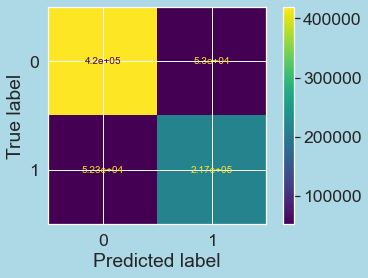

In [182]:
# Alternative confusion matrix
plot_confusion_matrix(Tree_Flight, X, y, values_format='.3g')
plt.show()

In [183]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, Prediction) * 100))

Testing Accuracy for Decision Tree Classifier: 85.64%


### Bagged Tree

In [184]:
#initiate bagged classifier
Tree_bagging =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [185]:
Tree_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [186]:
Tree_bagging.score(X_train, y_train)

0.8530893181413028

In [187]:
Tree_bagging.score(X_test, y_test)

0.857717457250073

### Model Performance

In [188]:
# Set prediction testing
Prediction_bt = Tree_bagging.predict(X_test)

In [189]:
print('\nConfusion Matrix')
pd.crosstab(y_test, Prediction_bt, rownames=['True'], colnames=['Predicted'], margins=True)




Confusion Matrix


Predicted,0,1,All
True,,,
0,126133,15555,141688
1,16105,64722,80827
All,142238,80277,222515


In [190]:
print('Classificiation Report')
print(classification_report(y_test, Prediction_bt))

Classificiation Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89    141688
           1       0.81      0.80      0.80     80827

    accuracy                           0.86    222515
   macro avg       0.85      0.85      0.85    222515
weighted avg       0.86      0.86      0.86    222515



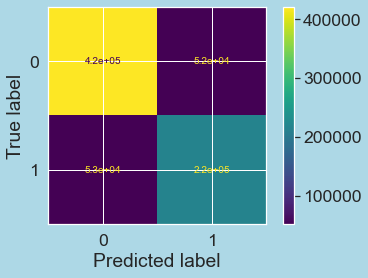

In [191]:
# Alternative confusion matrix
plot_confusion_matrix(Tree_bagging, X, y, values_format='.2g')
plt.show()

In [192]:
print("Testing Accuracy for Bagged Tree Classifier: {:.4}%".format(accuracy_score(y_test, Prediction_bt) * 100))

Testing Accuracy for Bagged Tree Classifier: 85.77%


### Random Forest

In [193]:
#instantiating the R
rand_for= RandomForestClassifier(n_estimators=100, max_depth=5)
rand_for.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [194]:
# checking the accuracy score
rand_for.score(X_train, y_train)

0.8543009339412563

In [195]:
# also test set:
rand_for.score(X_test, y_test)

0.86150596588994

### Model Performance

In [196]:
# Test set predictions

Prediction_rf = rand_for.predict(X_test)

In [197]:
print('\nConfusion Matrix')
pd.crosstab(y_test, Prediction_rf, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix


Predicted,0,1,All
True,,,
0,126256,15432,141688
1,15385,65442,80827
All,141641,80874,222515


In [198]:
print('Classificiation Report')
print(classification_report(y_test, Prediction_rf))

Classificiation Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89    141688
           1       0.81      0.81      0.81     80827

    accuracy                           0.86    222515
   macro avg       0.85      0.85      0.85    222515
weighted avg       0.86      0.86      0.86    222515



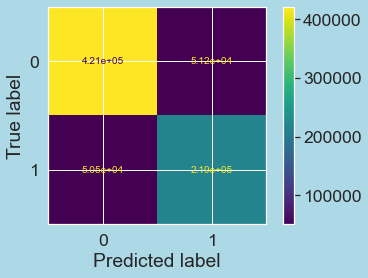

In [199]:
# Alternative confusion matrix
plot_confusion_matrix(rand_for, X, y, values_format='.3g')
plt.show()

In [200]:
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, Prediction_rf) * 100))



Testing Accuracy for Random Forest Classifier: 86.15%


### Decision trees

In [201]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = None)
classifierDT.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy')

In [202]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix



In [203]:
from sklearn.metrics import confusion_matrix

In [204]:
# Predicting the Test set results
y_pred = classifierDT.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
score = classifierDT.score(X_test_sc,y_test)

In [205]:
cm

array([[118394,  23294],
       [ 21248,  59579]])

In [206]:
score

0.9433880861964362

In [207]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))  


F1 score : 0.7847890916349626
Precision Score : 0.7833793927497232
Recall Score : 0.7863570346448729


In [208]:
print('Classificiation Report')
print(classification_report(y_test, y_pred))

Classificiation Report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84    141688
           1       0.72      0.74      0.73     80827

    accuracy                           0.80    222515
   macro avg       0.78      0.79      0.78    222515
weighted avg       0.80      0.80      0.80    222515



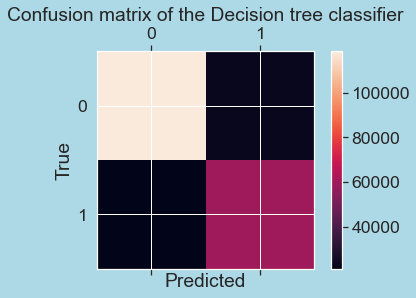

In [209]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Decision tree classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

In [211]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test_sc)

# Making the Confusion Matrix
score = classifier.score(X_test_sc,y_test)
cm = confusion_matrix(y_test, y_pred1)

In [212]:
cm

array([[141688,      0],
       [     1,  80826]])

In [213]:
score

0.9999955059209491

In [214]:
print("F1 score :",f1_score(y_test, y_pred1, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred1, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred1, average="macro"))  


F1 score : 0.9999951425210689
Precision Score : 0.999996471144549
Recall Score : 0.9999938139483093


In [215]:
print('Classificiation Report')
print(classification_report(y_test, y_pred1))

Classificiation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141688
           1       1.00      1.00      1.00     80827

    accuracy                           1.00    222515
   macro avg       1.00      1.00      1.00    222515
weighted avg       1.00      1.00      1.00    222515



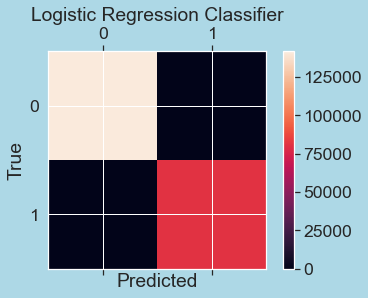

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Logistic Regression Classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()